<a href="https://colab.research.google.com/github/beau378/projet_scoring_resiliation_contrat_auto/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet_scoring

Objectifs : Cibler les clients qui vont résilier leur contrat auto

- Importer les données
- Analyser les données
- Représenter les données
- Créer des modèles de prédictions binaire
- Comprendre les algorithmes utilisés
- Savoir interpréter les sorties d'un modèle
- Comparer les modèles
- Optimiser un modèle
- Définir quel modèle est le plus pertinent en fonction de la problématique


# 1. Import des données

In [45]:
#Import packages
import pandas as pd

# Import des données
loc_file = r'Resiliation_Contrat_Auto.csv' # Remplacez par votre chemin d'accès aux données
df = pd.read_csv(loc_file,sep=";")
df.head(5)

,CDUSGAUT,IDECON,CD_FML,DTDBUCON,DTEFTMVT,MMJECHPP,MTPAATTC,CDMARVEH,DTOBTPDC,DTPMRMCI,...,DI,SA,IV,RESAU4R,RESMH,RESSA,RESIV,RESDI,CONTRAT,COEFPFLT
0,611.0,205808992,R,14630,14812,121.0,1929.66,PEUGEOT,10273.0,10683.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,ACTIF,0.8500
1,636.0,105939601,C,14701,14701,401.0,4106.44,PEUGEOT,12877.0,11262.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,ACTIF,0.7500
2,603.0,35070,S,4018,14707,407.0,1530.09,MERCEDES,NaN,5935.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,ACTIF,0.8065
3,603.0,700035247,T,6993,14707,407.0,2399.44,RENAULT,2953.0,11596.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,ACTIF,0.9965
4,611.0,500035255,C,7185,14707,1007.0,1342.84,RENAULT,-245.0,9497.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,ACTIF,0.9716


In [46]:
print(f'Nb lignes : {len(df)}')
print(f'Nb champs : {len(df.columns)}')

Nb lignes : 76978
Nb champs : 45


# 2. Compréhension des données et exploration

## 2.1 Métadonnées

In [47]:
#Info sur les types
info_types = pd.DataFrame(df.dtypes, columns=['type'])
info_types.sort_values('type') #pour ordonner par le champ 'type'

,type
NIVBM,int64
IDECON,int64
DTDBUCON,int64
DTEFTMVT,int64
NBCTRES,int64
ANCCLI,float64
CD_CSP,float64
DT_NAI,float64
DEPT,float64
NBCTACT,float64


- Les variables dates sont sctockees en int, elles seront traitees comme telles, car elles sont stockees       ainsi par rapport a une date de reference le 01/01/1960.

- Les variables telles que CDUSGAUT : le code d'usage de l'auto, CD_CSP : Code de la categorisation socio-     professionnelle, MOTIFRSL : Motif de resiliation doivent etre converties en variable categorielle.

In [48]:
#Conversion des variables ['CDUSGAUT', 'CD_CSP', 'MOTIFRSL'] en categorielles.
for var in ['CDUSGAUT', 'CD_CSP', 'MMJECHPP', 'DEPT']:
    df[var] = df[var].astype('object')


## 2.2 Exploration des variables numériques

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Info sur les variables numériques
col_to_exclude = ['IDECON', 'DTEFTMVT', 'DTDBUCON', 'DTOBTPDC', 'DTPMRMCI', 'ANCCLI', 'DT_NAI',
                  'S_3_N', 'S_3_O', 'NBCTRES', 'NBCTACT', 'AU4R', 'RESAU4R']


info_df_num = df[[col for col in df.select_dtypes(include=['int', 'float']).columns
                  if col not in col_to_exclude]].describe().round(2)

info_df_num.transpose()

,count,mean,std,min,25%,50%,75%,max
MTPAATTC,76978.0,3095.44,1941.73,0.00,1804.16,2670.67,3870.24,62556.82
RN_VL_VH,76837.0,7.84,3.69,1.00,5.00,7.00,10.00,18.00
S_2_N,8187.0,1.11,0.34,1.00,1.00,1.00,1.00,4.00
S_1_N,9259.0,1.13,0.37,1.00,1.00,1.00,1.00,5.00
S_0_N,9040.0,1.11,0.34,1.00,1.00,1.00,1.00,4.00
S_2_O,3072.0,1.04,0.19,1.00,1.00,1.00,1.00,3.00
S_1_O,3686.0,1.04,0.20,1.00,1.00,1.00,1.00,3.00
S_0_O,3758.0,1.04,0.21,1.00,1.00,1.00,1.00,3.00
NIVBM,76978.0,59.31,16.29,0.00,50.00,50.00,64.00,243.00
MTPAAREF,76978.0,5004.18,3397.85,220.00,2783.00,4176.00,6169.75,70421.00


In [50]:
# Valeurs manquantes _ Variables numériques :

col_to_exclude = ['IDECON', 'S_3_N', 'S_3_O', 'NBCTRES', 'NBCTACT', 'AU4R', 'RESAU4R', 'DTEFTMVT']

list_var_num = df.select_dtypes(include='number').columns.difference(col_to_exclude)

modalites = []
nb_nan = []
nb_distincts = []
for v in list_var_num :
    modalites.append(str(sorted(df[v].unique().tolist())))
    nb_nan.append(df[v].isnull().sum())
    nb_distincts.append(df[v].nunique())

info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variable"] = list_var_num
info_df_num_2["Modalité"] = modalites
info_df_num_2["NbDistinctVal"] = nb_distincts
info_df_num_2["NbMissingVal"] = nb_nan
info_df_num_2["%NbMissingVal"] = round(info_df_num_2["NbMissingVal"] / len(df), 2)

info_df_num_2

,variable,Modalité,NbDistinctVal,NbMissingVal,%NbMissingVal
0,ANCCLI,"[-24514.0, -10592.0, -8766.0, -1645.0, -1461.0...",9463,17,0.00
1,COEFPFLT,"[0.2938, 0.33, 0.343, 0.3539, 0.386, 0.3945, 0...",7430,0,0.00
2,DI,"[0.0, 1.0, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...",13,4572,0.06
3,DTDBUCON,"[-21549, -11049, -7639, -4809, -4505, -3836, -...",8830,0,0.00
4,DTOBTPDC,"[-14244.0, -13271.0, -11685.0, -10748.0, -1071...",15351,167,0.00
5,DTPMRMCI,"[5935.0, 6179.0, 6575.0, 6940.0, 7305.0, 7671....",537,799,0.01
6,DT_NAI,"[-110388.0, -21877.0, -21549.0, -19480.0, -192...",21841,185,0.00
7,IV,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...",22,4572,0.06
8,MH,"[0.0, 1.0, 2.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ...",16,4572,0.06
9,MTPAAREF,"[220.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227...",14097,0,0.00


On remarque que les variables representant le nombre de sinitres considere sur 12 mois et celui d'avant etc. ont jusqu'a 97% des valeurs qui sont manquantes. Vu leurs modalites de reponse, on peut conclure que pour tout cas de sinitre non enregistre, le champ est laisse vide. Ce qui fait que ces valeurs manquantes peuvent etre imputees par 0.

Les variables de resiliation de contrats d'assurance auto, habitation, maison etc. ont beaucoup de valeurs manquantes, ce sont des variables conditionnelles, ... **A continuer

## 2.3 Exploration des variables catégorielles

In [51]:
# Liste des colonnes catégorielles à inclure (hors exclusions)
list_var_cat = df.select_dtypes(include='object').columns.tolist()

# Calcul des stats pour les variables catégorielles
info_df_cat = pd.DataFrame({
    "variables": list_var_cat,
    "NbDistinctVal": df[list_var_cat].nunique().values,
    "NbMissingVal": df[list_var_cat].isnull().sum().values
})
info_df_cat["%NbMissingVal"] = (info_df_cat["NbMissingVal"] / len(df)).round(2)

info_df_cat.reset_index(drop=True, inplace=True)
info_df_cat

,variables,NbDistinctVal,NbMissingVal,%NbMissingVal
0,CDUSGAUT,68,16,0.00
1,CD_FML,25,445,0.01
2,MMJECHPP,365,11,0.00
3,CDMARVEH,233,77,0.00
4,LBMDLVH,6206,95,0.00
5,NOTAREFF,17,230,0.00
6,PUI_TRE,14,138,0.00
7,CD_CSP,223,34613,0.45
8,CD_SEX,2,84,0.00
9,CDSITFAM,7,317,0.00


Nous avons des variables categorielles avec plus de 6000 modalites de reponses. Les variables avec de fortes modalites seront analysees a part.

### 2.3.1 Exploration des variables categorielles a fortes modalites

In [52]:
import pandas as pd

print(f"\nModalités et occurrences :\n")

counts = df['CDMARVEH'].value_counts()
freqs = df['CDMARVEH'].value_counts(normalize=True) * 100
modalites = pd.DataFrame({'count': counts, 'pourcentage (%)': freqs})

with pd.option_context('display.max_rows', None):  # pour forcer l'affichage complet
    print(modalites)


Modalités et occurrences :

                 count  pourcentage (%)
CDMARVEH                               
RENAULT          23743        30.874761
PEUGEOT          15841        20.599212
CITROEN          10253        13.332726
FORD              4719         6.136461
VOLKSWAGEN        4203         5.465469
OPEL              3219         4.185901
FIAT              3069         3.990845
MERCEDES          1667         2.167722
B.M.W.            1197         1.556547
NISSAN             998         1.297772
TOYOTA             919         1.195043
AUDI               917         1.192442
SEAT               899         1.169036
ROVER              783         1.018192
HONDA              478         0.621578
MAZDA              386         0.501944
VOLVO              355         0.461632
ALFA ROMEO         282         0.366705
AUSTIN             268         0.348500
LANCIA             244         0.317291
MITSUBISHI         238         0.309489
LADA               181         0.235368
TALBOT(SIMC

In [53]:
import pandas as pd
import re

# Dictionnaire de correction des erreurs de saisie
marques_dict = {
    "RENAULT": "RENAULT",
    "RENAULTCLIO": "RENAULT",
    "RENAULT 4 FGTTE": "RENAULT",
    "RENAULT 6": "RENAULT",
    "RENAULT 6 R1181": "RENAULT",
    "RENAULT 1120": "RENAULT",
    "RENAULT 18 GTL": "RENAULT",
    "RENAULT R11 GTC": "RENAULT",
    "RENAULT 5 TURBO": "RENAULT",
    "RENAULT 5TL R12": "RENAULT",
    "RENAULT CLIO": "RENAULT",
    "RENAULT CLIO RN": "RENAULT",
    "RENAULT EXPRESS": "RENAULT",
    "RENAULT R1340": "RENAULT",
    "RENAULT R1126": "RENAULT",
    "RENAULT R 2109": "RENAULT",

    "PEUGEOT": "PEUGEOT",
    "PEUGOET": "PEUGEOT",
    "VP PEUGEOT 304": "PEUGEOT",
    "FOURGON PEUGEOT": "PEUGEOT",
    "PEUGEOT 104 A01": "PEUGEOT",
    "PEUGEOT 205SR": "PEUGEOT",

    "CITROEN": "CITROEN",
    "CITOREN": "CITROEN",
    "CI CITROEN D SU": "CITROEN",
    "CITROEN GS": "CITROEN",
    "CITROEN VA SIE": "CITROEN",
    "CITROEN ZX": "CITROEN",
    "VP CITROEN VISA": "CITROEN",
    "VP CITROEN 2 CI": "CITROEN",
    "CITROEN CX 2500": "CITROEN",
    "CITROEN 2CV6": "CITROEN",
    "CITROEN 2CVX 6": "CITROEN",
    "CI CITROEN LN": "CITROEN",

    "SIMCA TALBOT": "TALBOT(SIMCA)",
    "SIMCA HORIZON": "SIMCA",
    "SIMCA BREAK 110": "SIMCA",
    "SIMCA SA VP": "SIMCA",
    "SIMCA 1100": "SIMCA",
    "TALBOT SIMCA": "TALBOT(SIMCA)",
    "TALBOT (SIMCA)": "TALBOT(SIMCA)",
    #"TALBOT(SIMCA)": "TALBOT",
    "TALBOT HORIZON": "TALBOT",
    "TALBOT(MATRA)": "TALBOT",
    #"SIMCA": "TALBOT",

    "FORD": "FORD",
    "FORD TRANSIT": "FORD",
    "FORD ESCORT": "FORD",
    "FORD SIERRA": "FORD",
    "FORD FIESTA": "FORD",
    "FORDULT": "FORD",
    "FORD JEEP XILLY": "FORD",
    "FROD": "FORD",
    "FORD T": "FORD",

    "VOLKSWAGEN": "VOLKSWAGEN",
    "VW": "VOLKSWAGEN",
    "VV": "VOLKSWAGEN",
    "V.W": "VOLKSWAGEN",
    "VOLKWAGEN": "VOLKSWAGEN",
    "VOLSKWAGEN": "VOLKSWAGEN",
    "VOLKWWAGEN": "VOLKSWAGEN",
    "WOLKSWAGEN": "VOLKSWAGEN",
    "VOLKSVAGEN": "VOLKSWAGEN",
    "WOLSVAGEN": "VOLKSWAGEN",
    "V W": "VOLKSWAGEN",
    "WV": "VOLKSWAGEN",
    "VW POLO": "VOLKSWAGEN",
    "LKSWAGEN": "VOLKSWAGEN",

    "MERCEDES": "MERCEDES",
    "MERCEDEZ": "MERCEDES",
    "MERCEDES BENZ": "MERCEDES",
    "MERCDES": "MERCEDES",
    "MECEDES": "MERCEDES",
    "MERCEDESEO": "MERCEDES",

    "B.M.W.": "B.M.W.",
    "BMW": "B.M.W.",
    "BWM": "B.M.W.",
    "VP BMW 323": "B.M.W.",

    "ALFA ROMEO": "ALFA ROMEO",
    "ALFA-ROMEO": "ALFA ROMEO",
    "ALFAROMEO": "ALFA ROMEO",
    "ALFA": "ALFA ROMEO",
    "CABRIOLET ALFA": "ALFA ROMEO",
    "ALFETTA": "ALFA ROMEO",

    "FIAT": "FIAT",
    "FIAT UNO": "FIAT",
    "FIAT UNO TD": "FIAT",
    "FIAT T": "FIAT",
    "FIAT 128 SPORT": "FIAT",
    "FIAT PANDA": "FIAT",
    "RIMOR FIAT": "FIAT",

    "MAZDA": "MAZDA",
    "MAZDZA": "MAZDA",
    "MAZDAT": "MAZDA",

    "HONDA": "HONDA",
    "HONDA CIVIC": "HONDA",
    "HONDALT": "HONDA",

    "HOTCHKISS": "HOTCHKISS",
    "CTTE HOTCHKISS": "HOTCHKISS",
    "HOTCHKIS": "HOTCHKISS",

    "DAF": "DAF",
    "DAFF": "DAF",

    "WILLYS": "WILLYS",
    "WILLY": "WILLYS",
    "WILLYS OWERLAND": "WILLYS",
    "WILLIS-OVERLAND": "WILLYS",
    "WILL": "WILLYS",

    "LAND ROVER": "LAND ROVER",
    "RANGE ROVER": "LAND ROVER",
    "RANGE ROOVER": "LAND ROVER",
    "LAND": "LAND ROVER",

    "AUSTINT": "AUSTIN",
    "AUSTIN MINI": "AUSTIN",

     "ROLLS ROYC": "ROLLS ROYCE",
    "LANCIAANCHI": "LANCIA",
    "SUZUKY": "SUZUKI",
    "DATSUN NISSAN": "DATSUN",
    "IVECO UNIC": "IVECO",
    "TOYOTA RUNNER": "TOYOTA",
    "TEIHOL": "TEILHOL",
}
def nettoyer_marque(val):
    if pd.isna(val):
        return val
    val = str(val).strip().upper()
    val = val.replace('.', '').strip()   # retirer les points
    val = re.sub(r'\s+', ' ', val)  # supprimer espaces multiples
    return marques_dict.get(val, val)  # retourne la version corrigée si elle existe

df["CDMARVEH"] = df["CDMARVEH"].apply(nettoyer_marque)


In [54]:
print(df['CDMARVEH'].value_counts())

CDMARVEH
RENAULT          23757
PEUGEOT          15846
CITROEN          10263
FORD              4741
VOLKSWAGEN        4278
                 ...  
FORD ORION           1
NASH                 1
DE DIONBOUTON        1
RENULT               1
BENTLEY              1
Name: count, Length: 135, dtype: int64


# 3. Représentations graphiques des catégorielles par rapport à la cible

In [55]:
import plotly.express as px

def plot_stacked_bar(df, x_var, color_var):
    temp_df = df.groupby([x_var, color_var]).size().reset_index(name='counts')
    temp_df = temp_df.sort_values(color_var)

    fig = px.bar(temp_df, x=x_var, y='counts', color=color_var)
    fig.update_traces(textposition='auto', textfont_size=12)
    fig.update_layout(barmode='stack', title=f'Distribution de {x_var} par {color_var}')
    fig.show()

# Application à toutes les variables catégorielles
target = 'CONTRAT'
for var in list_var_cat:
    if var not in ['CONTRAT', 'LBMDLVH', 'MMJECHPP', 'CDUSGAUT', 'CD_CSP']:
        print(f"\n--- Distribution pour {var} ---")
        plot_stacked_bar(df, x_var=var, color_var=target)


--- Distribution pour CD_FML ---



--- Distribution pour CDMARVEH ---



--- Distribution pour NOTAREFF ---



--- Distribution pour PUI_TRE ---



--- Distribution pour CD_SEX ---



--- Distribution pour CDSITFAM ---



--- Distribution pour DEPT ---



--- Distribution pour REGION ---


# 4. Représentations graphiques des continues par rapport à la cible

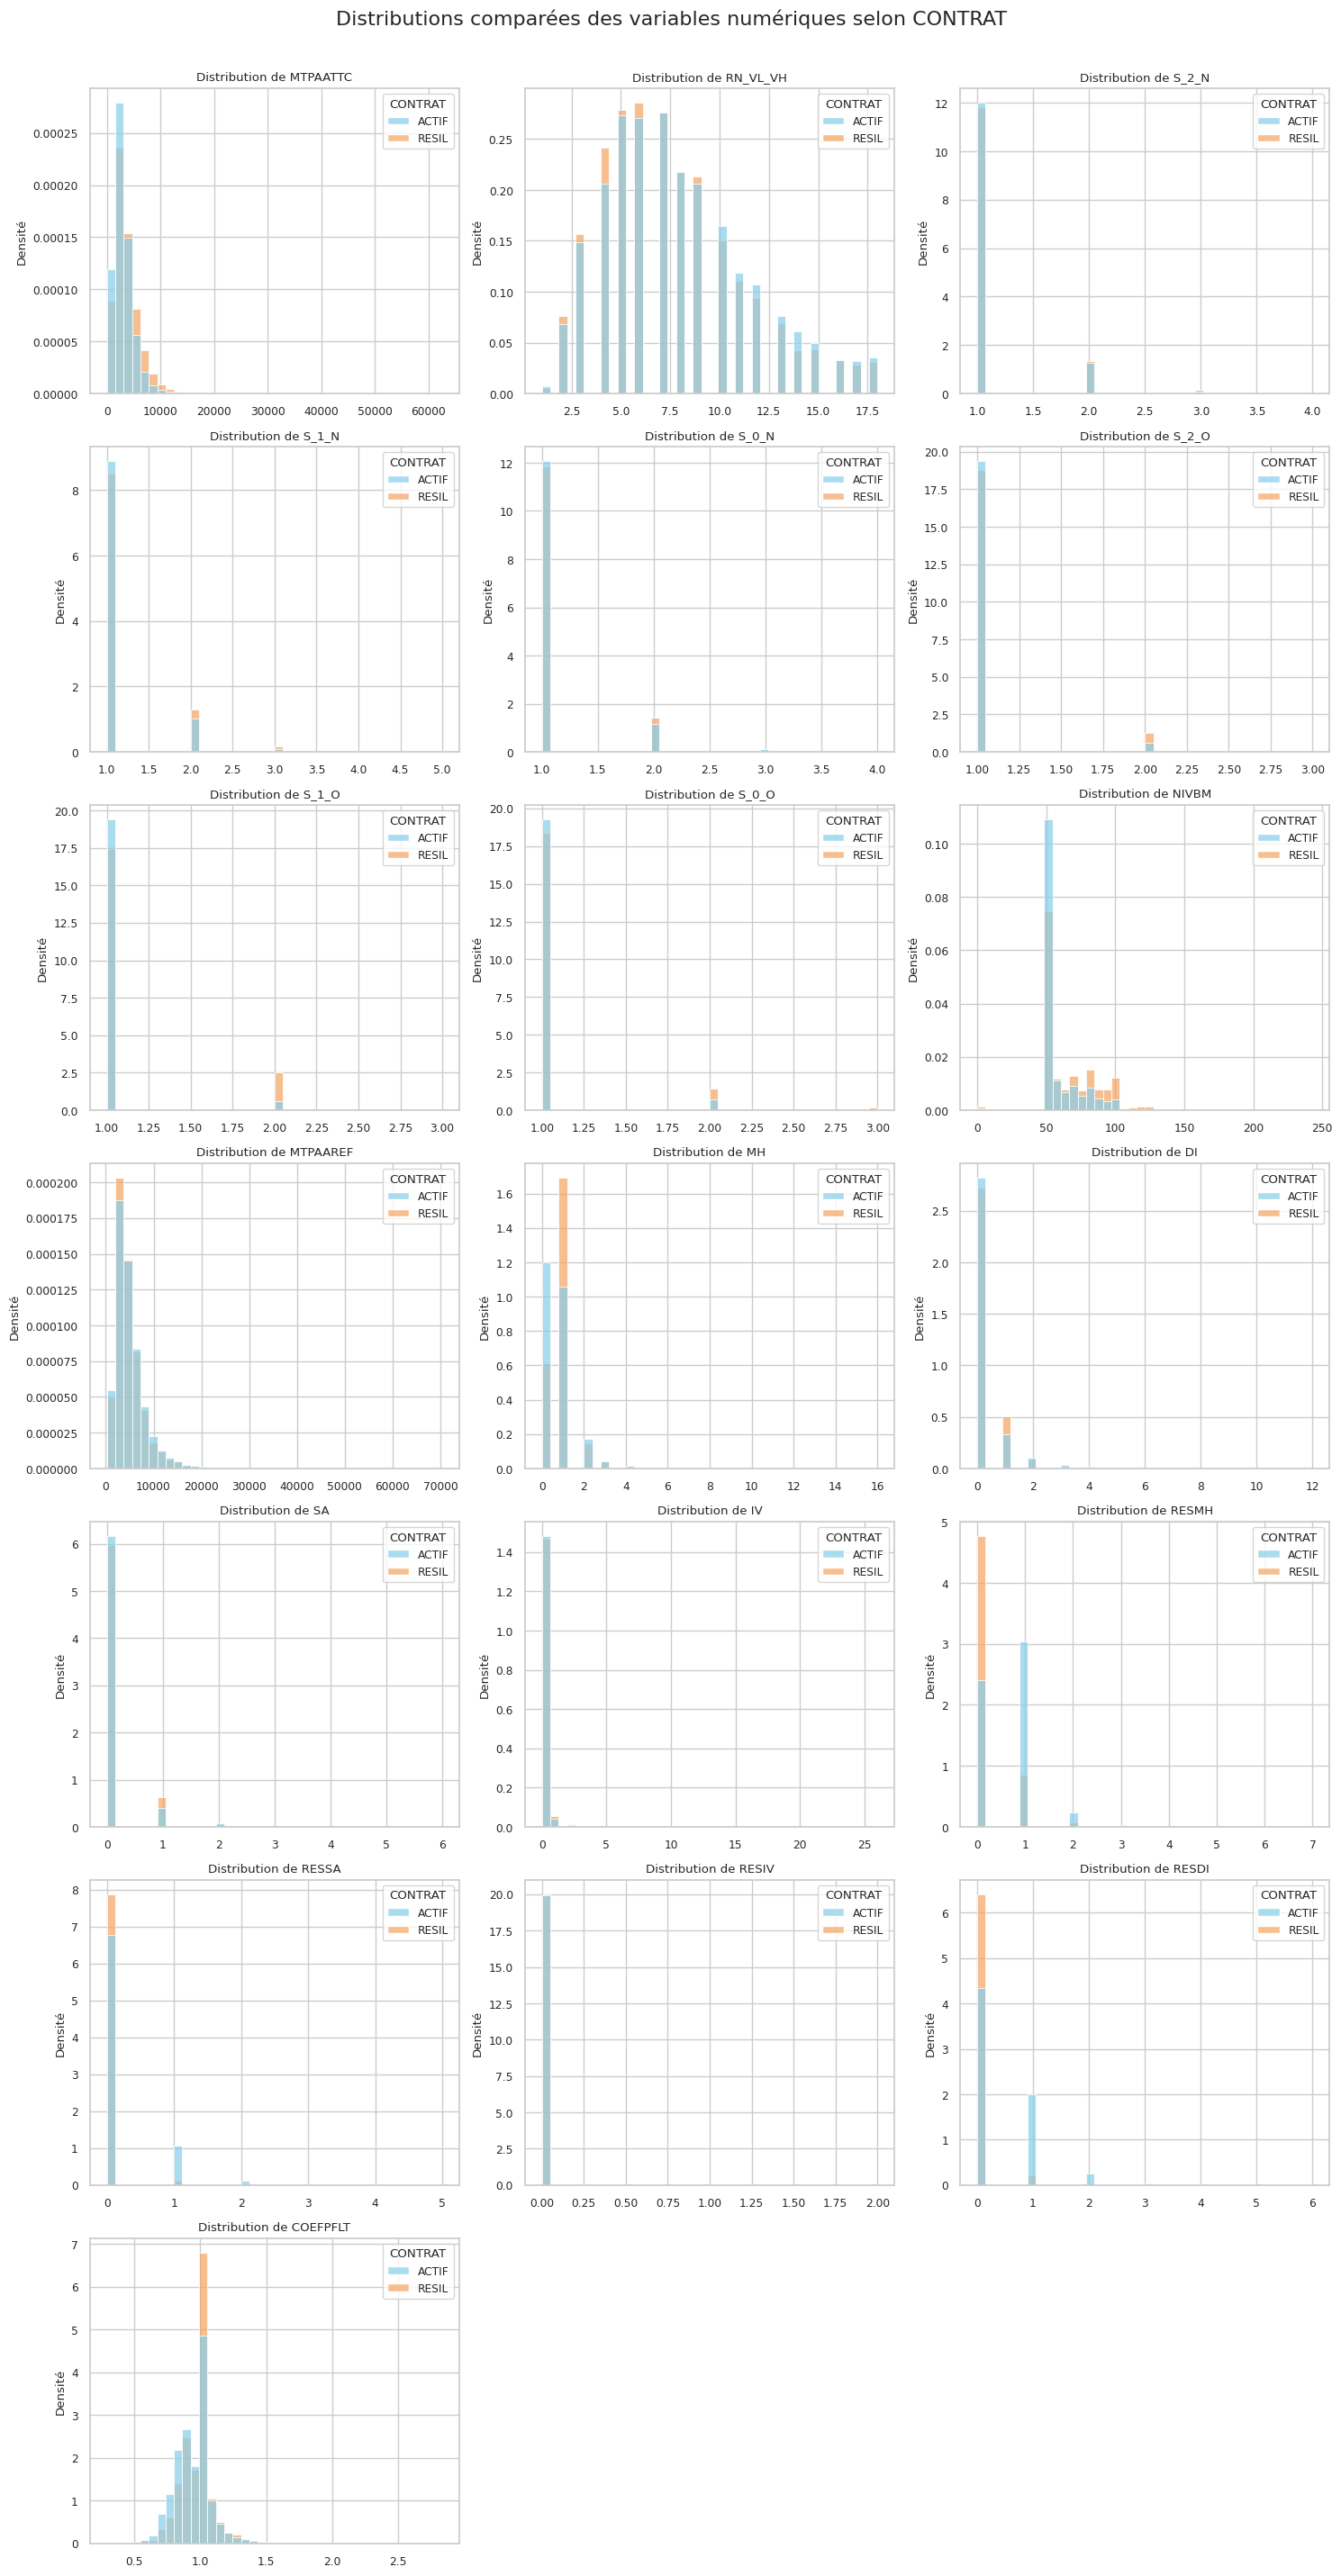

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Définir les variables à exclure

vars_to_plot = [v for v in info_df_num.columns]

n_cols = 3
n_rows = math.ceil(len(vars_to_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Boucle sur les variables
for i, var in enumerate(vars_to_plot):
    sns.histplot(
        data=df, x=var, hue='CONTRAT',
        bins=40, stat='density', common_norm=False,
        palette={'ACTIF': "skyblue", 'RESIL': "sandybrown"},
        alpha=0.7, ax=axes[i]
    )

    for val in [0, 1]:
        median_val = df[df['CONTRAT'] == val][var].median()
        color = 'skyblue' if val == 0 else 'sandybrown'
        axes[i].axvline(median_val, color=color, linestyle='--', linewidth=1.5)

    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Densité")

# Supprimer les axes vides
for j in range(len(vars_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distributions comparées des variables numériques selon CONTRAT", fontsize=16, y=1.02)
plt.show()

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def distrib_for_cont_by_target(var, df, target):
    """
    Affiche la distribution (densité) d'une variable continue `var` selon une variable cible binaire.
    """
    df_temp = df[[var, target]].dropna()
    target_vals = df_temp[target].unique()

    fig, axes = plt.subplots(1, len(target_vals), figsize=(14, 5), sharey=True)
    if len(target_vals) == 1:
        axes = [axes]

    for i, val in enumerate(sorted(target_vals)):
        subset = df_temp[df_temp[target] == val][var]
        sns.histplot(subset, kde=True, stat="density", ax=axes[i], bins=30,
                     color='steelblue', edgecolor='black')
        axes[i].set_title(f"{target} = {val}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Densité")

        # Statistiques
        mean = subset.mean()
        median = subset.median()
        stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}"
        axes[i].text(0.02, 0.95, stats_text, transform=axes[i].transAxes,
                     verticalalignment='top', fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'))

    plt.tight_layout()
    plt.show()

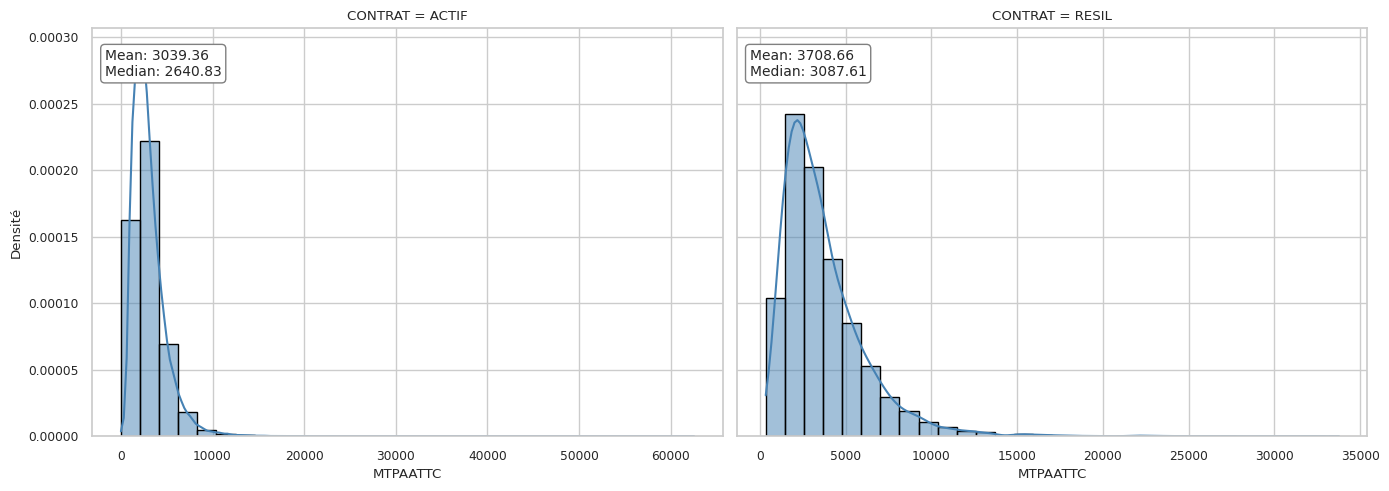

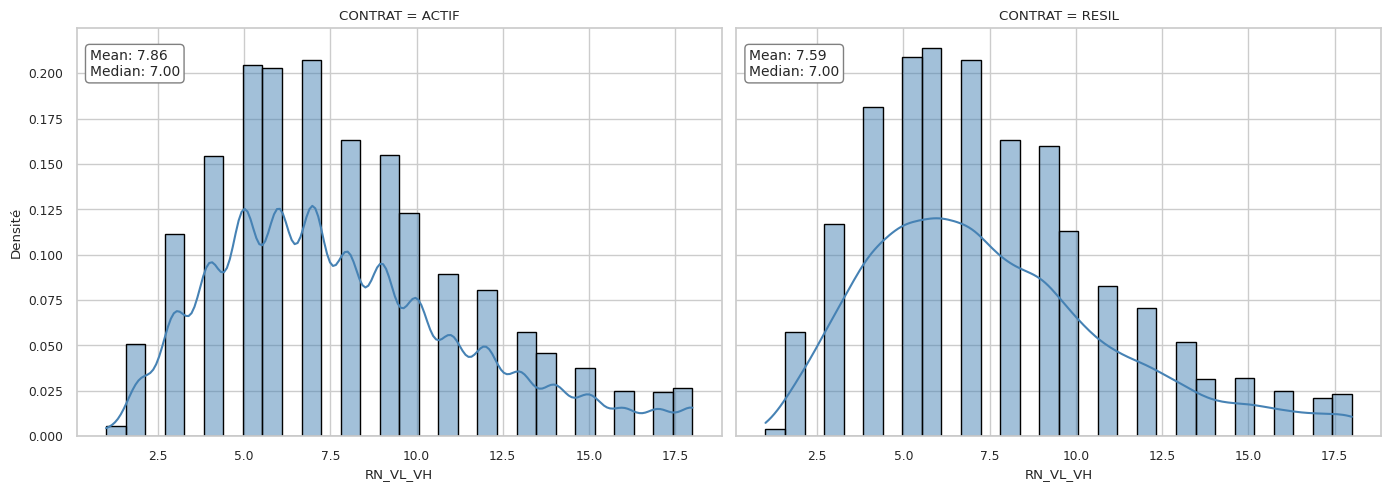

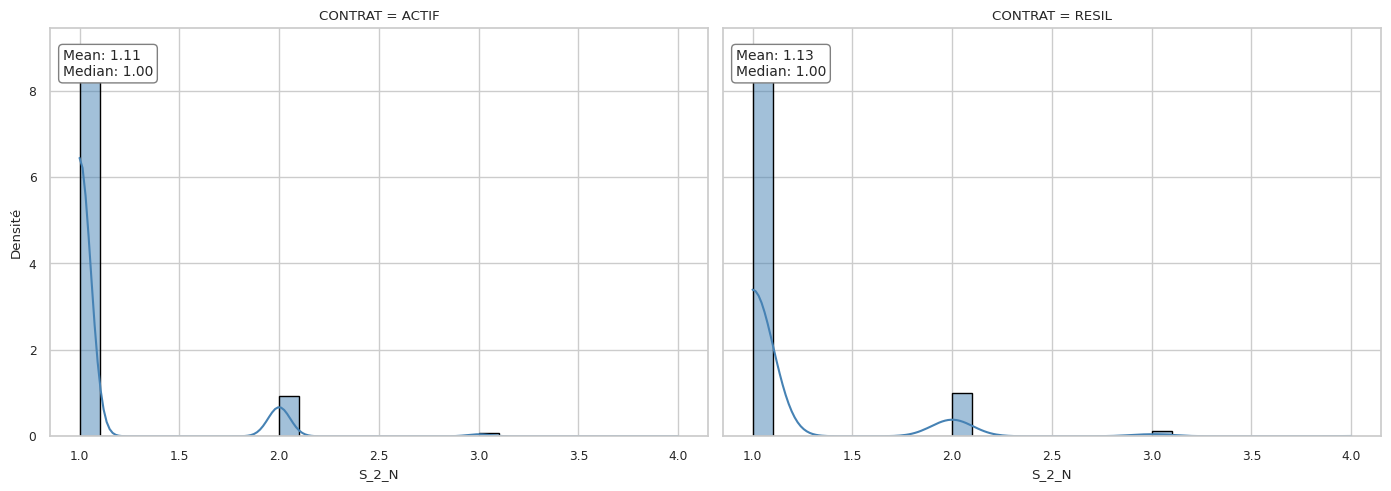

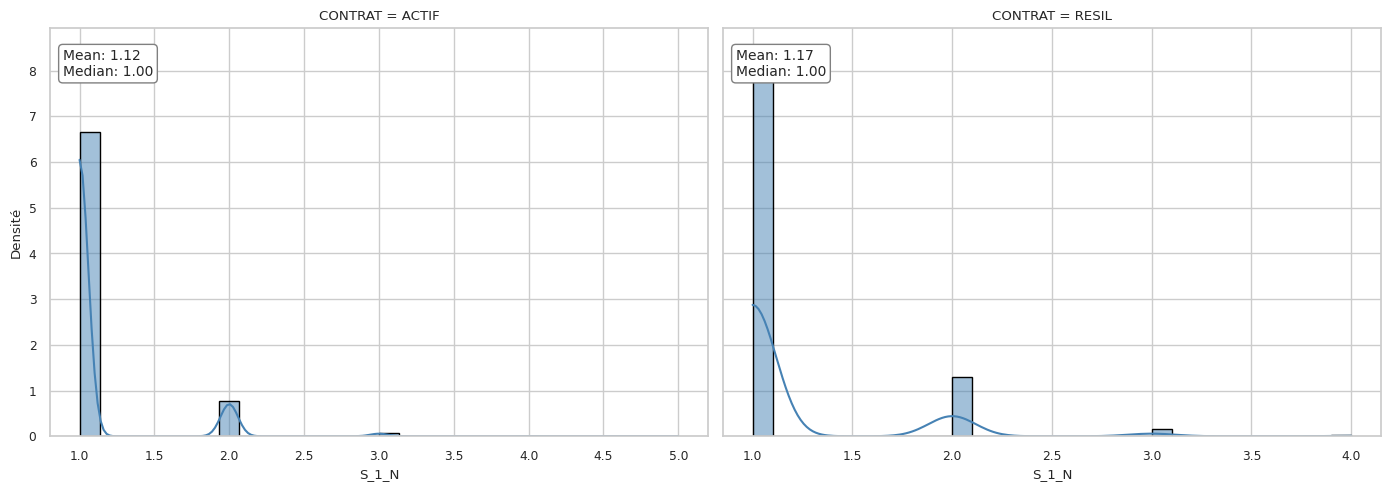

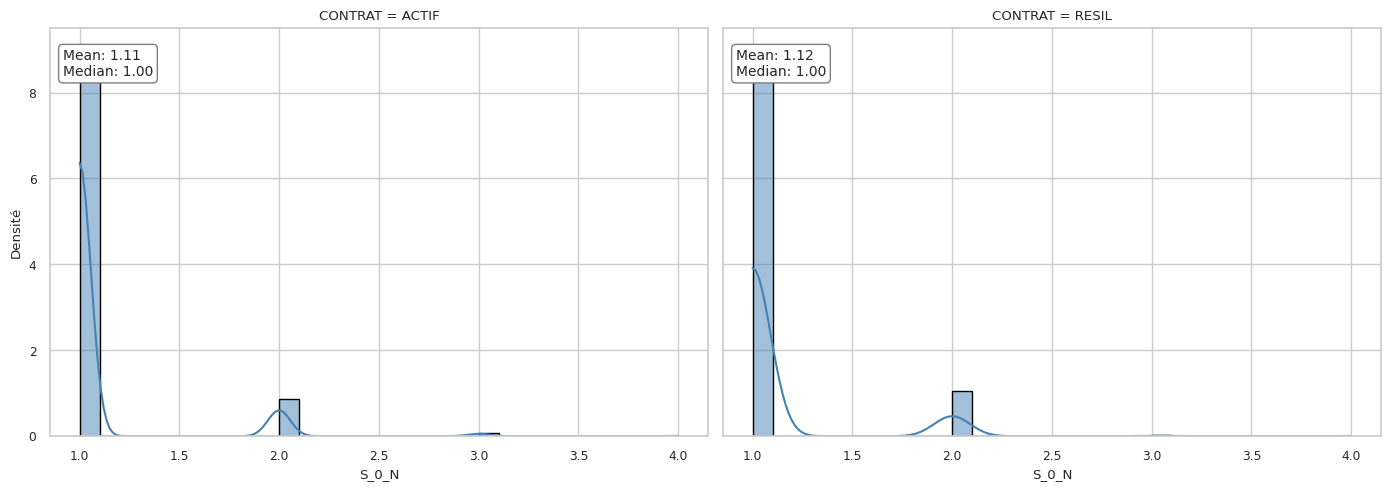

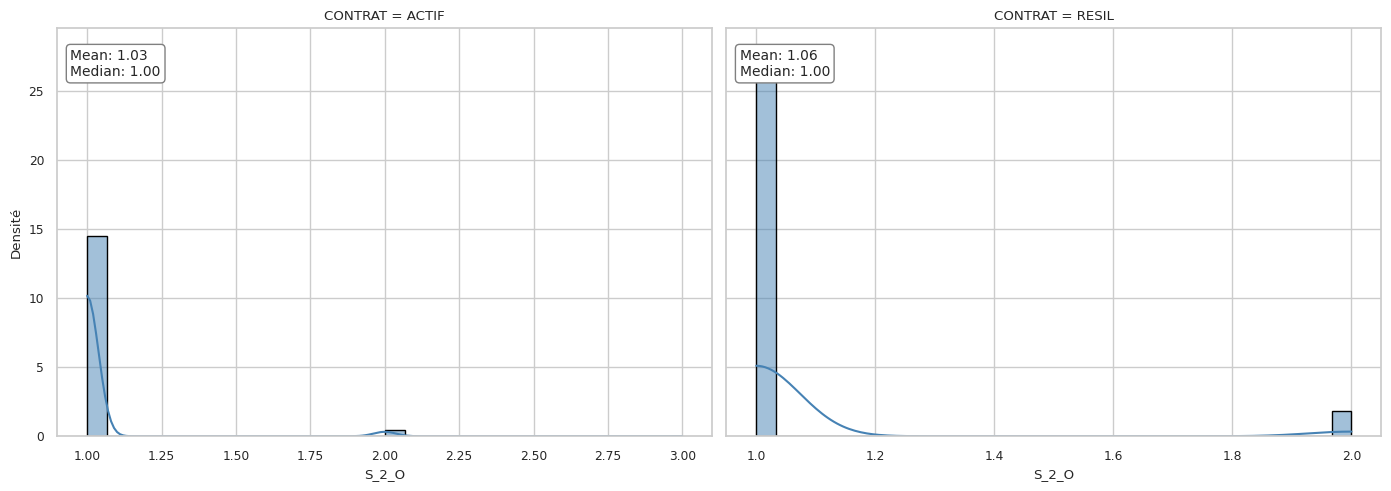

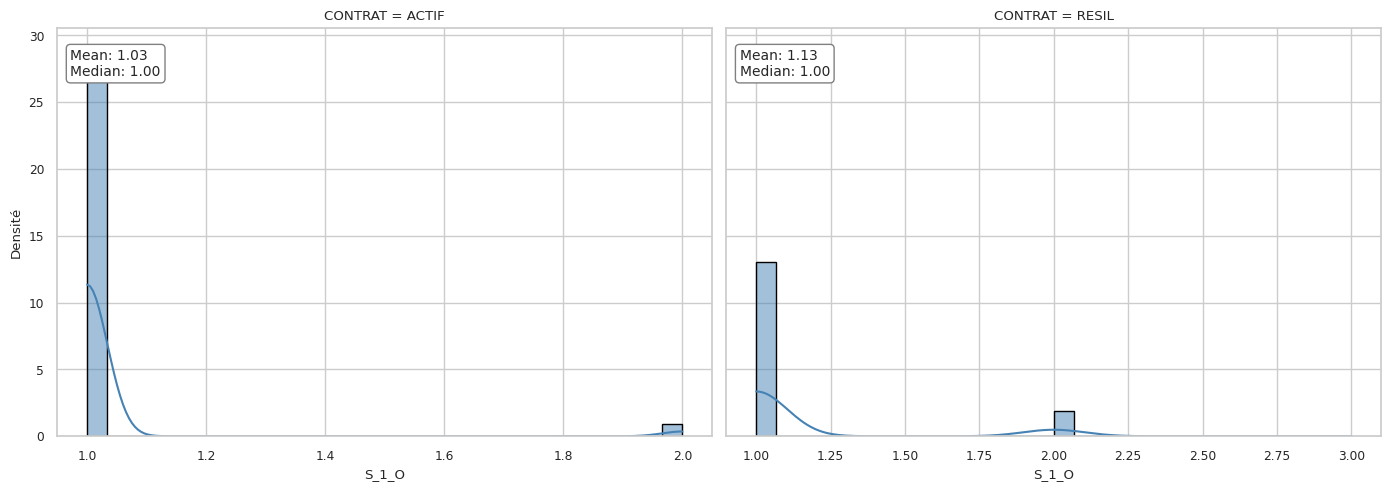

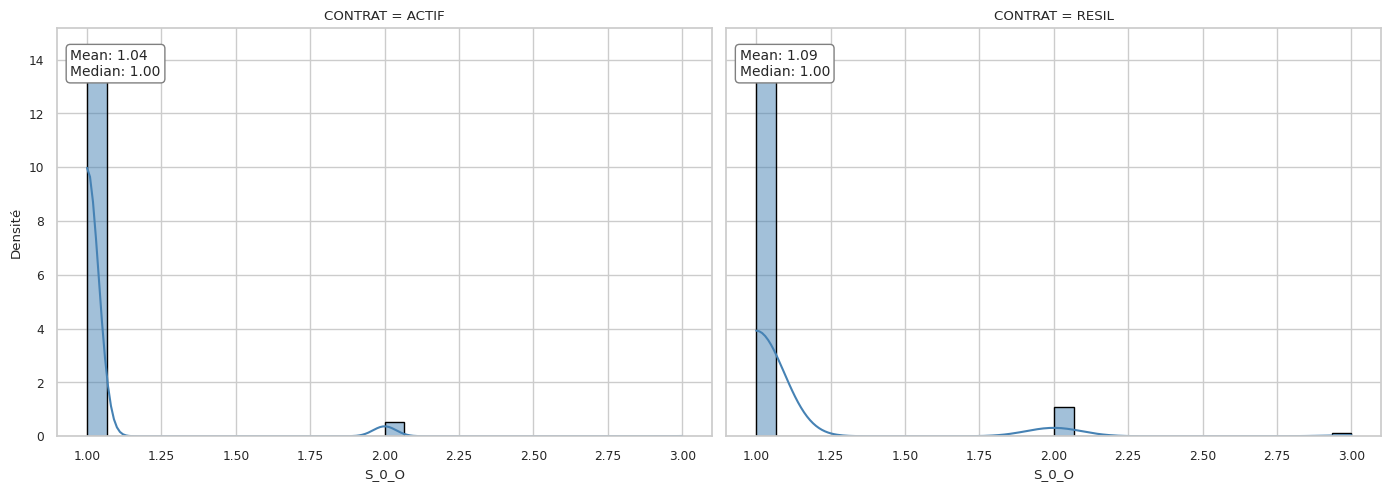

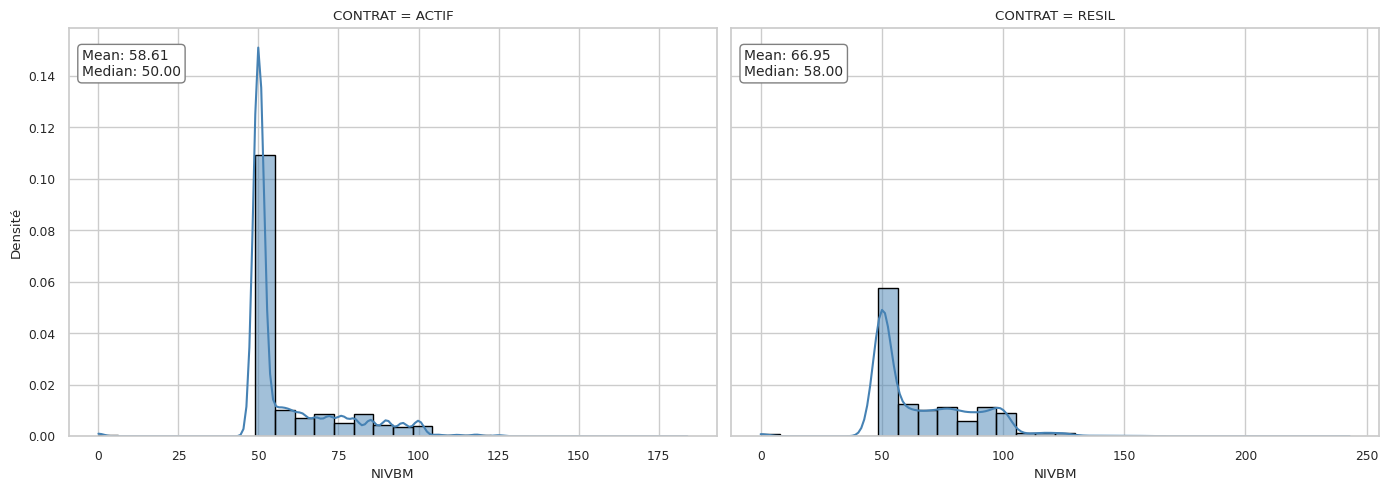

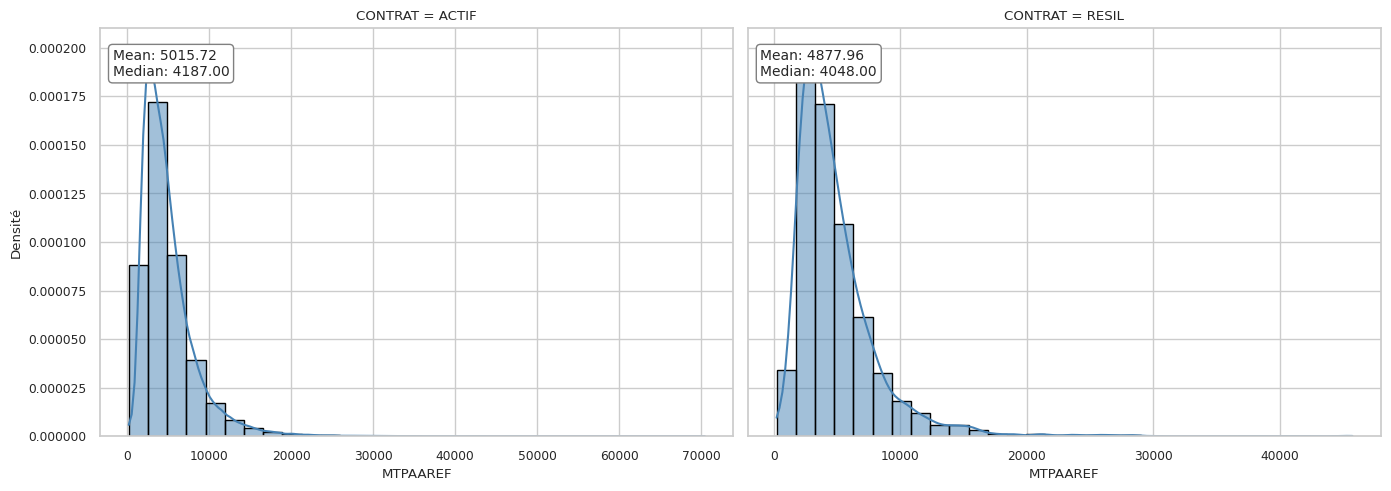

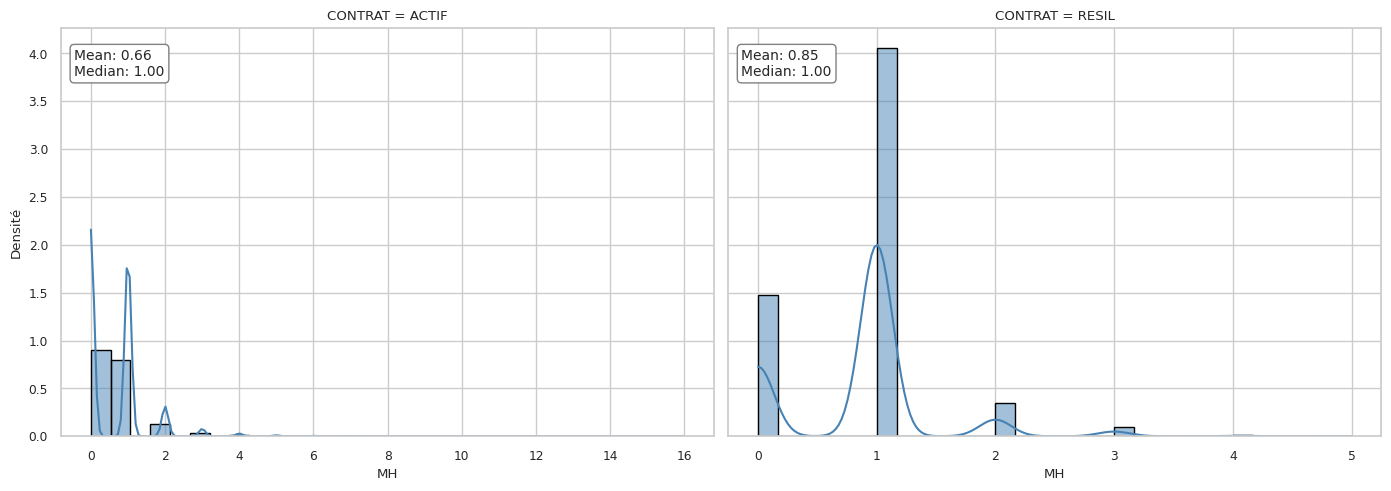

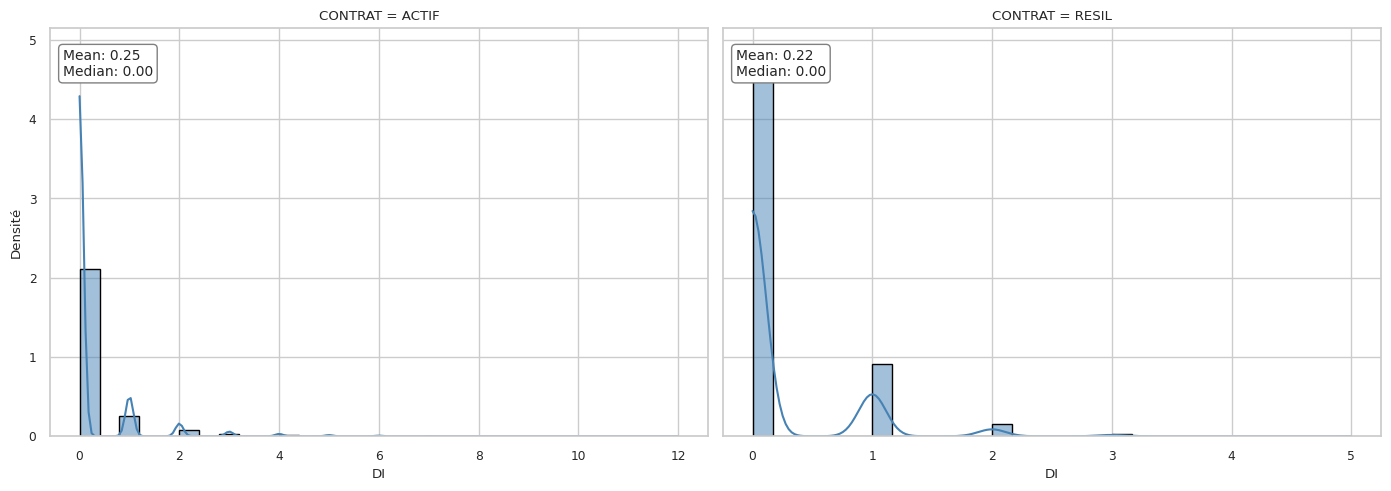

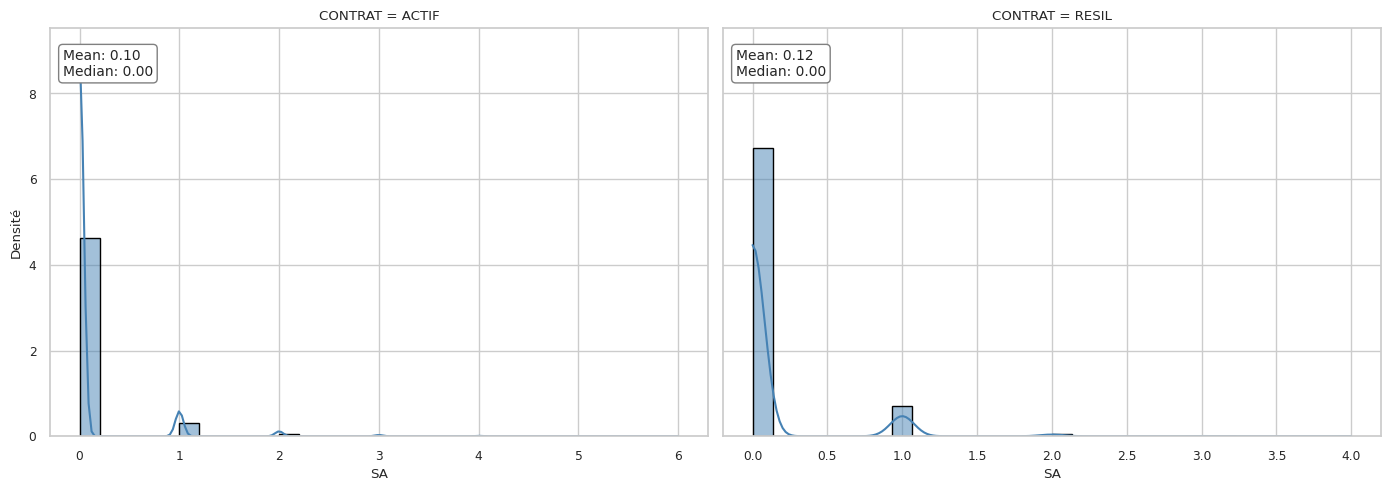

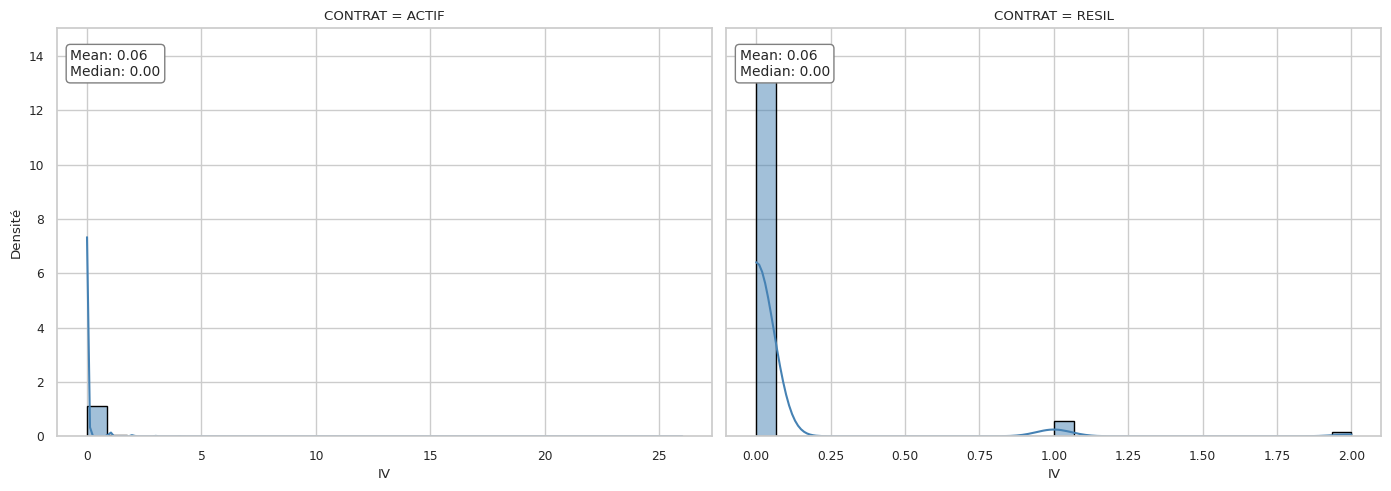

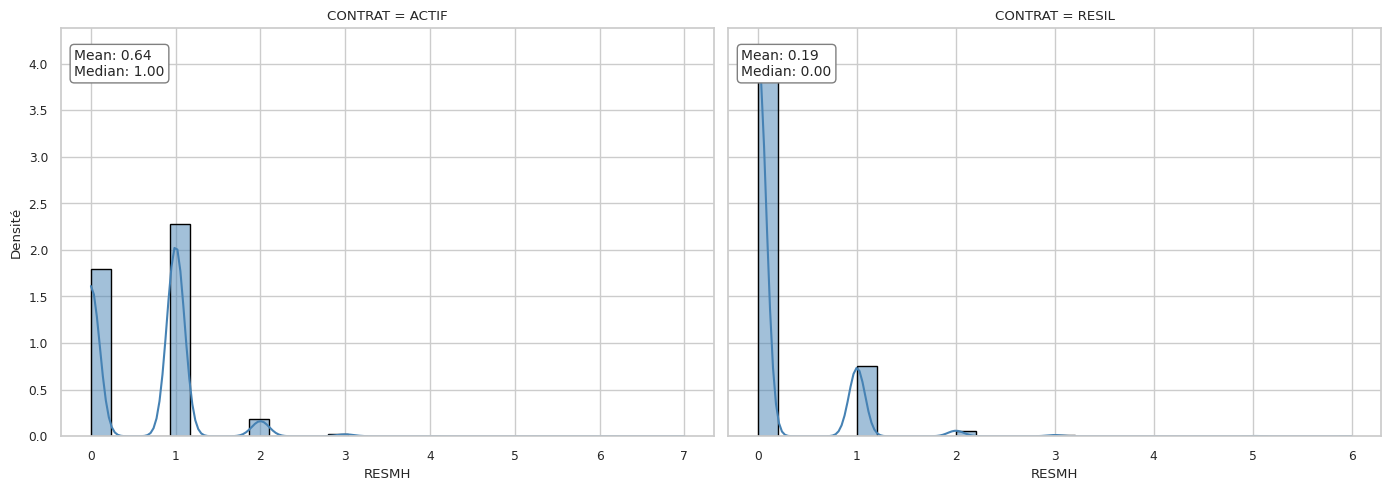

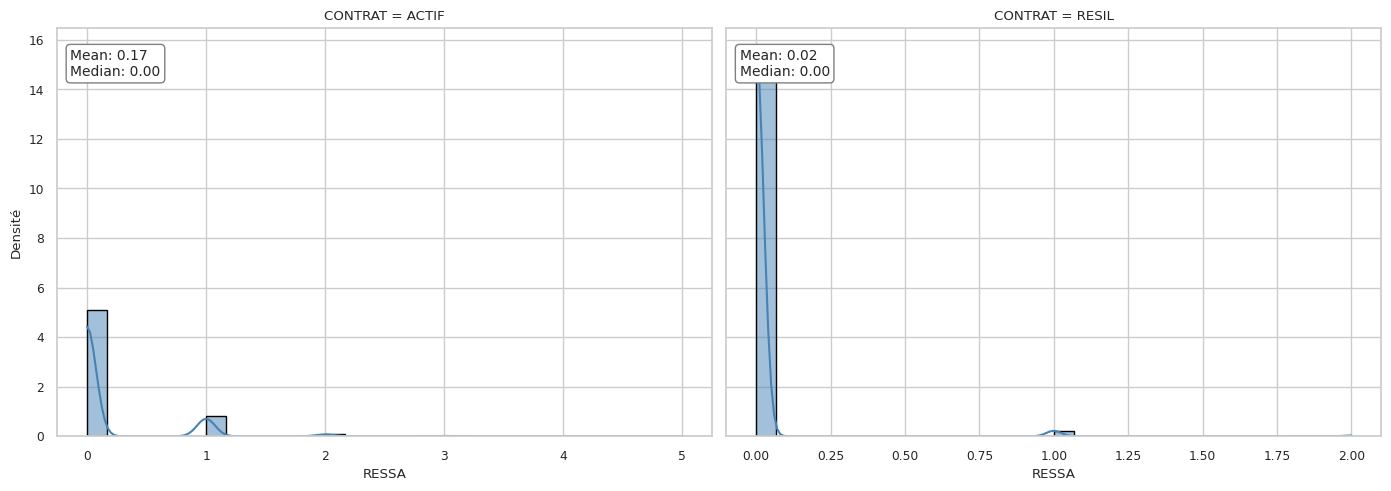

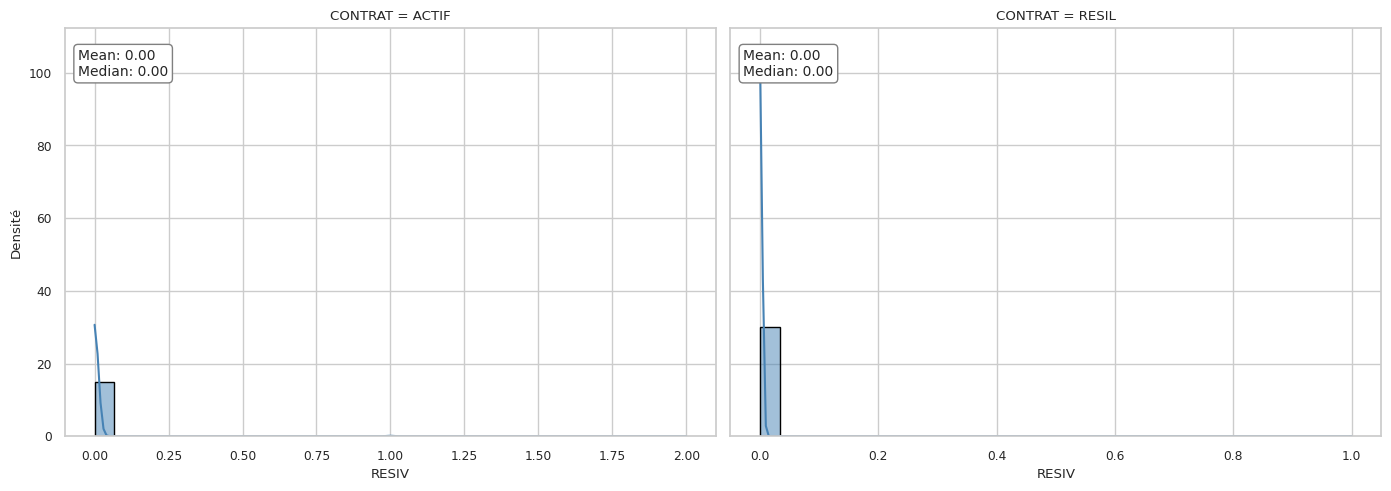

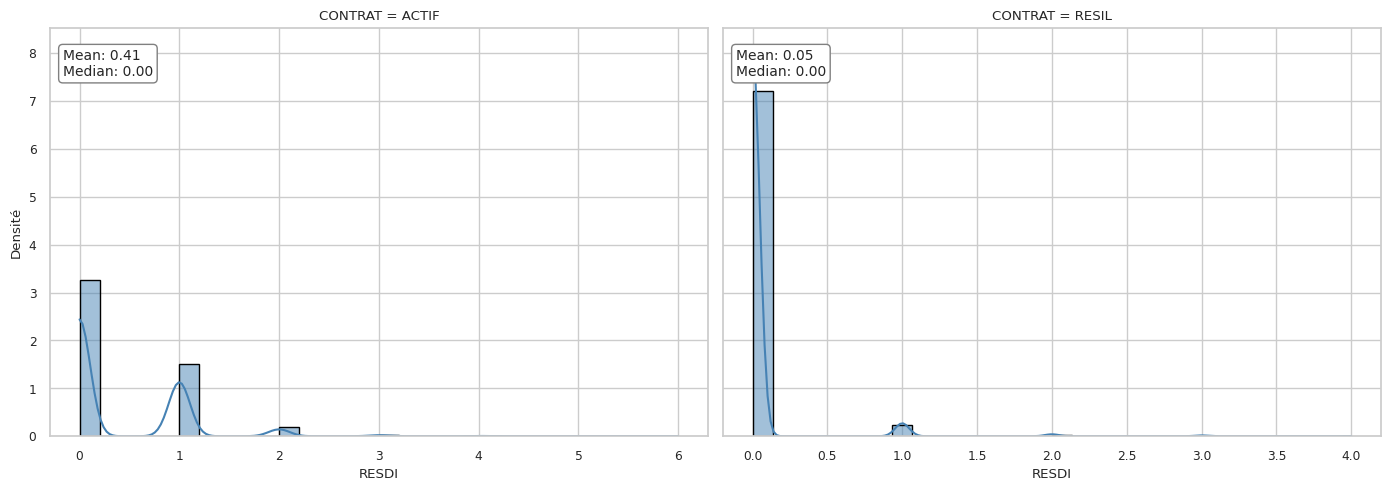

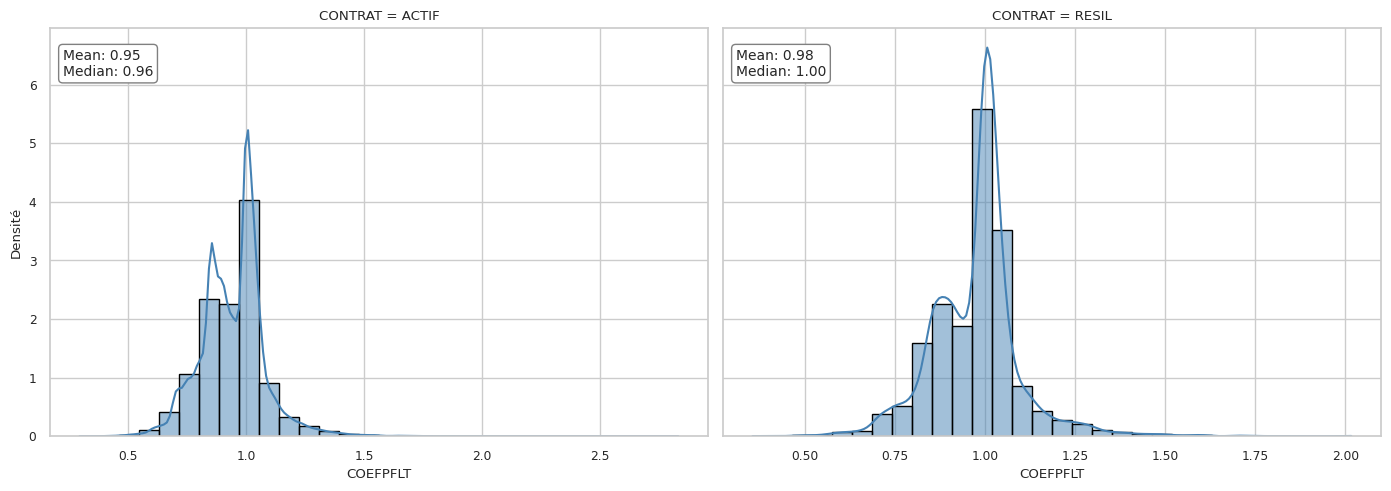

In [59]:
vars_to_plot = [v for v in info_df_num.columns]

for field in vars_to_plot:
    distrib_for_cont_by_target(field, df, target)

# 5. Encodage 0 1 variable cible

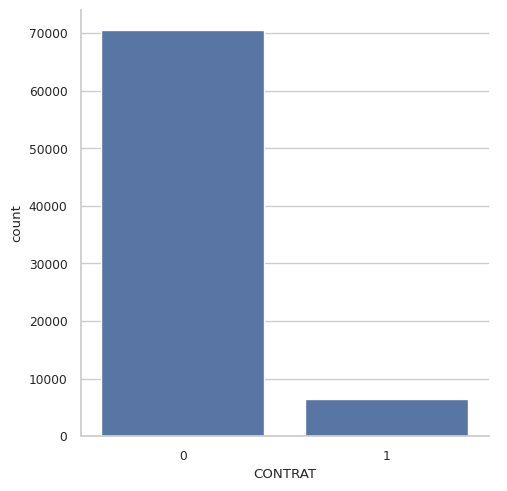

In [61]:
# Encodage de la variable cible
import numpy as np
import seaborn as sns
target = "CONTRAT"
df[target] = np.where(df[target] == 'RESIL', 1, 0)
sns.catplot(x=target,kind="count",data=df)

# 6. Taux_de_resiliation_par_variables

In [62]:
def compute_df(df: pd.DataFrame, col: str, target_col: str) -> pd.DataFrame:
    """
    Calcule, pour chaque modalité/valeur de 'col', le nombre d'observations et le pourcentage de 1
    dans la variable cible 'target_col'.

    Paramètres
    ----------
    df : pd.DataFrame
        DataFrame contenant les données.
    col : str
        Nom de la colonne explicative à étudier.
    target_col : str
        Nom de la variable cible binaire (ex. défaut = 1).

    Retourne
    --------
    pd.DataFrame
        DataFrame contenant les colonnes :
          - col : modalité ou intervalle
          - counts_group : nombre de 1 dans target_col pour cette modalité
          - counts_total : nombre total d'observations dans cette modalité
          - pct : pourcentage de 1 dans cette modalité
    """
    # Nombre d'observations avec target==1 par modalité
    df_group = df[df[target_col] == 1].groupby(col, observed=False).size().reset_index(name='counts_group')
    # Nombre total d'observations par modalité
    df_total = df.groupby(col, observed=False).size().reset_index(name='counts_total')
    # Fusionner les deux résultats et calculer le pourcentage
    df_res = pd.merge(df_group, df_total, on=col, how='inner')
    df_res['pct'] = (df_res['counts_group'] / df_res['counts_total']) * 100
    df_res['pct'] = df_res['pct'].fillna(0)
    return df_res

In [63]:
def replace_neg(interval_str: str) -> str:
    """
    Remplace la borne inférieure négative d'un intervalle par 0.

    Paramètres
    ----------
    interval_str : str
        Représentation textuelle d'un intervalle (ex. "(-10, 20]").

    Retourne
    --------
    str
        Intervalle modifié si la borne inférieure est négative, sinon inchangé.
    """
    parts = interval_str.split(",")
    lower = float(parts[0].strip("(["))
    if lower < 0:
        return f"(0, {parts[1].strip()}"
    else:
        return interval_str

In [64]:
def compute_df_binned(df: pd.DataFrame, col: str, bins: int, target_col: str, cut: bool = True, q: int = 10) -> pd.DataFrame:
    """
    Effectue le binning d'une variable continue et calcule les taux de défaut pour chaque bin.
    Les valeurs spéciales (0 et -1) sont traitées séparément.

    Paramètres
    ----------
    df : pd.DataFrame
        DataFrame contenant les données.
    col : str
        Nom de la variable continue à binner.
    bins : int
        Nombre de bins à utiliser pour les valeurs > 0.
    target_col : str
        Nom de la variable cible binaire.
    cut : bool, optionnel
        Si True, utilise pd.cut ; sinon, utilise pd.qcut. Par défaut True.
    q : int, optionnel
        Nombre de quantiles à utiliser avec qcut. Par défaut 10.

    Retourne
    --------
    pd.DataFrame
        DataFrame contenant les résultats du calcul (effectifs et pourcentages) par bin.
    """
    frames = []
    # Binning pour les valeurs strictement positives
    df_pos = df[df[col] > 0].copy()
    if not df_pos.empty:
        df_pos['bin'] = pd.cut(df_pos[col], bins=bins, precision=0) if cut else pd.qcut(df_pos[col], q=q, precision=0, duplicates='drop')
        # Conversion en chaîne et remplacement de la borne inférieure négative si nécessaire
        df_pos['bin_str'] = df_pos['bin'].astype(str).apply(replace_neg)
        frames.append(compute_df(df_pos, 'bin_str', target_col))
    # Traitement des valeurs spéciales : -1 et 0
    for special in [-1, 0]:
        df_special = df[df[col] == special].copy()
        if not df_special.empty:
            df_special['bin_str'] = str(special)
            frames.append(compute_df(df_special, 'bin_str', target_col))
    if frames:
        return pd.concat(frames, ignore_index=True)
    else:
        return pd.DataFrame()

In [65]:
def compute_df_categorical(df: pd.DataFrame, col: str, target_col: str) -> pd.DataFrame:
    """
    Calcule les taux de défaut pour une variable catégorielle.

    Paramètres
    ----------
    df : pd.DataFrame
        DataFrame contenant les données.
    col : str
        Nom de la variable catégorielle.
    target_col : str
        Nom de la variable cible binaire.

    Retourne
    --------
    pd.DataFrame
        DataFrame avec effectifs et taux de défaut par modalité.
    """
    return compute_df(df, col, target_col)

In [66]:
def plot_bin(df_res: pd.DataFrame, title: str, x_label: str, variable: str, pct_col: str = 'pct',
             rotation: int = 0, xticks_font_size: int = 18, annot_font_size: int = 14,
             unit: str = '%', loc: str = 'upper right'):
    """
    Représente graphiquement les résultats en affichant :
      - Un diagramme en barres pour le nombre total d'observations par modalité.
      - Un graphique linéaire (en superposition) du taux de défaut.

    Paramètres
    ----------
    df_res : pd.DataFrame
        DataFrame contenant les colonnes 'counts_total', 'counts_group' et le taux de défaut (pct).
    title : str
        Titre du graphique.
    x_label : str
        Label de l'axe des x.
    variable : str
        Nom de la colonne utilisée pour l'axe des x (ex. 'bin_str' ou la variable catégorielle).
    pct_col : str, optionnel
        Nom de la colonne contenant le taux de défaut (par défaut 'pct').
    rotation : int, optionnel
        Angle de rotation des labels de l'axe des x.
    xticks_font_size : int, optionnel
        Taille de la police des labels de l'axe des x.
    annot_font_size : int, optionnel
        Taille de la police pour les annotations sur le graphique.
    unit : str, optionnel
        Unité à afficher pour le taux (par défaut '%').
    loc : str, optionnel
        Position de la légende.
    """
    fontsize = 18
    _, ax1 = plt.subplots(figsize=(20, 10))
    ind = np.arange(len(df_res))

    # Diagramme en barres pour le nombre total d'observations
    ax1.bar(ind, df_res['counts_total'], color='tab:orange', width=0.9)
    ax1.set_xlabel(x_label, fontsize=fontsize)
    ax1.set_ylabel("Nb Total d'Observations par Tranche", color='tab:orange', fontsize=fontsize)
    ax1.tick_params(axis='y', labelcolor='tab:orange', labelsize=fontsize)
    ax1.set_xticks(ind)
    ax1.set_xticklabels(df_res[variable], rotation=rotation, fontsize=xticks_font_size)

    # Graphique linéaire pour le taux de défaut
    ax2 = ax1.twinx()
    ax2.set_ylabel("% de défaut, par tranche", color='tab:blue', fontsize=fontsize)
    p_line, = ax2.plot(ind, df_res[pct_col], color='tab:blue', marker='o')
    ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=fontsize)
    ax2.set_ylim(bottom=0)

    # Annotation de chaque point du graphique linéaire
    for i, pct in zip(ind, df_res[pct_col]):
        ax2.annotate(f"{round(pct, 2)}{unit}", xy=(i, pct), xytext=(i, pct + 0.1), fontsize=annot_font_size)

    # Ligne horizontale représentant le taux global de défaut
    overall_pct = (df_res['counts_group'].sum() / df_res['counts_total'].sum()) * 100
    p_hline = ax2.plot(ind, [overall_pct] * len(df_res), color='tab:red')

    ax2.legend((p_line, p_hline[0]), ('Taux de défaut', 'Taux de défaut moyen'), loc=loc)
    plt.title(title, fontsize=fontsize)
    plt.show()

In [67]:
def plot_generic(dataframe: pd.DataFrame, var: str, target: str, bins: int = 10, force_binning: bool = True):
    """
    Analyse l'impact d'une variable explicative sur le taux de défaut.
    Si la variable possède plus de 100 modalités distinctes ou si force_binning est True, elle est traitée comme continue
    avec binning. Sinon, elle est traitée comme catégorielle.

    Paramètres
    ----------
    dataframe : pd.DataFrame
        DataFrame contenant les données.
    var : str
        Nom de la variable explicative.
    target : str
        Nom de la variable cible binaire (ex. défaut = 1).
    bins : int, optionnel
        Nombre de bins à utiliser pour une variable continue (par défaut 10).
    force_binning : bool, optionnel
        Si True, la variable sera traitée comme continue avec binning, même si elle a moins de 100 modalités distinctes.
    """
    print(f"Analyse des taux de défaut en fonction de la variable {var}")

    if force_binning or dataframe[var].nunique() > 100:
        try:
            df_res = compute_df_binned(dataframe, var, bins, target, cut=False, q=bins)
            x_var = 'bin_str'
        except:
            df_res = compute_df_categorical(dataframe, var, target)
            x_var = var
    else:
        df_res = compute_df_categorical(dataframe, var, target)
        x_var = var

    title = "Taux de défaut"
    plot_bin(df_res, title, var, x_var, rotation=90)

Analyse des taux de défaut en fonction de la variable MTPAATTC


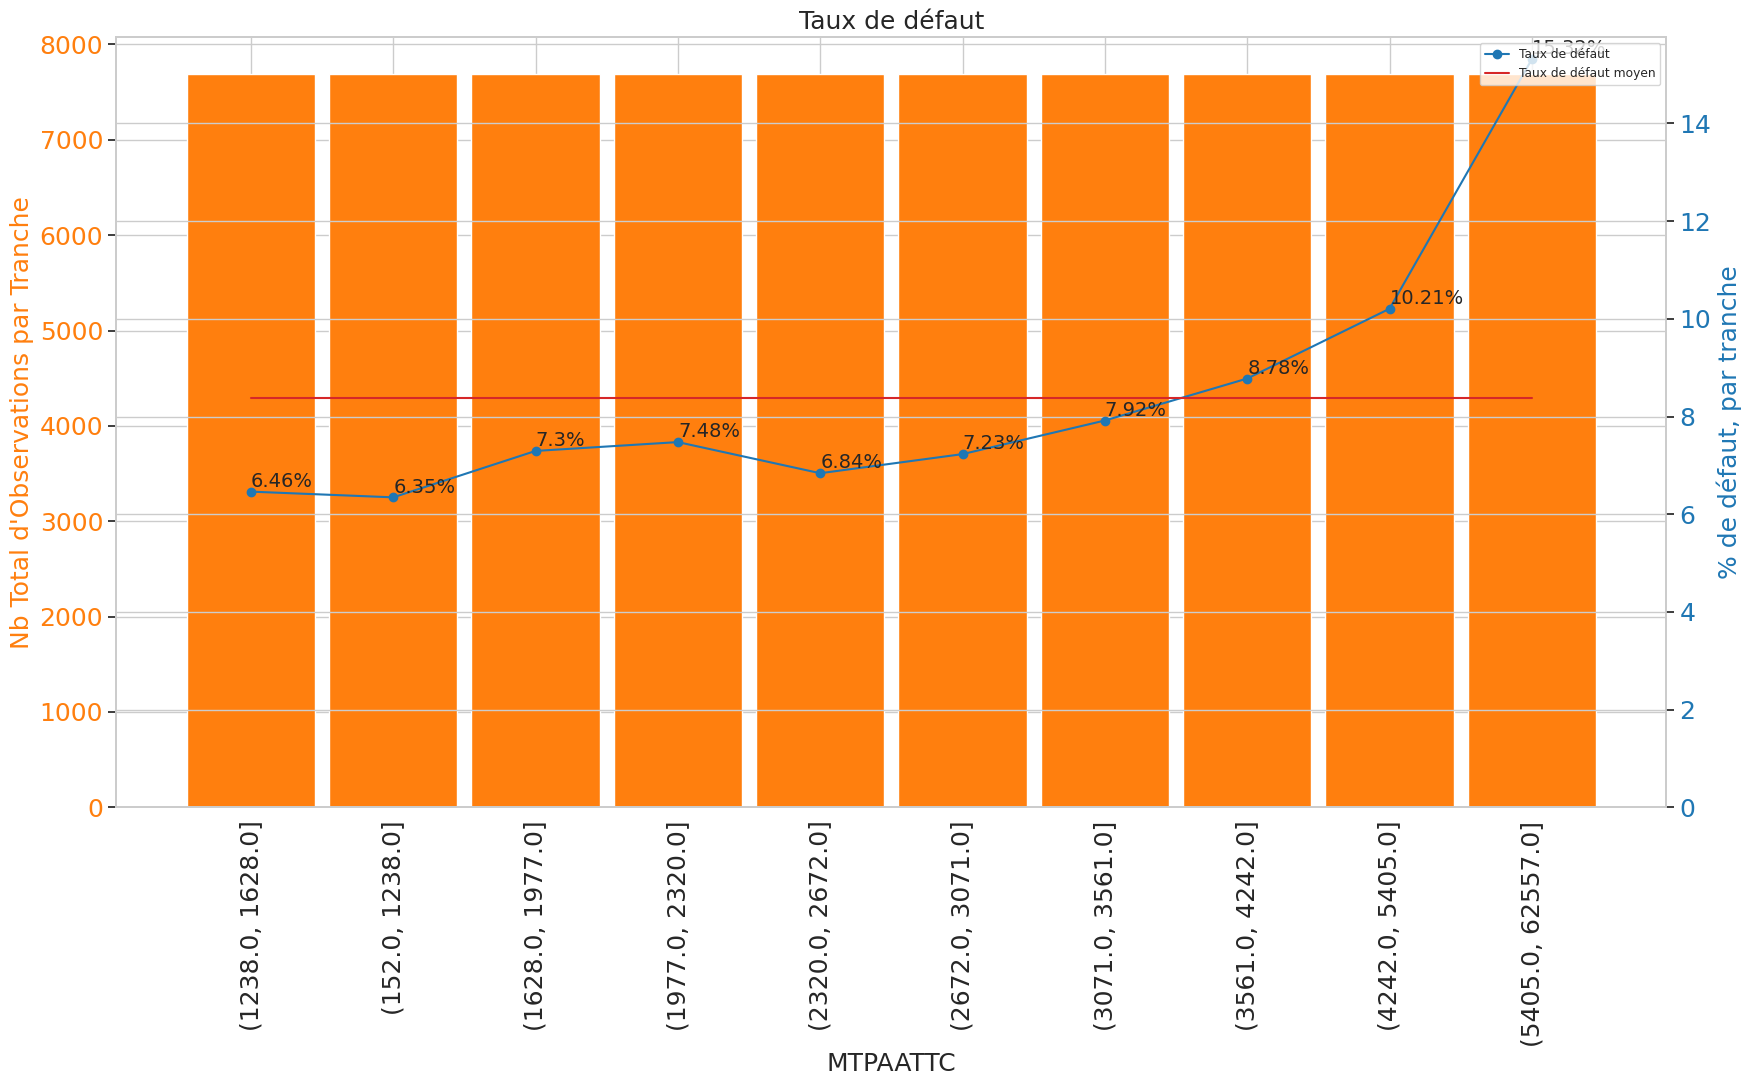

Analyse des taux de défaut en fonction de la variable RN_VL_VH


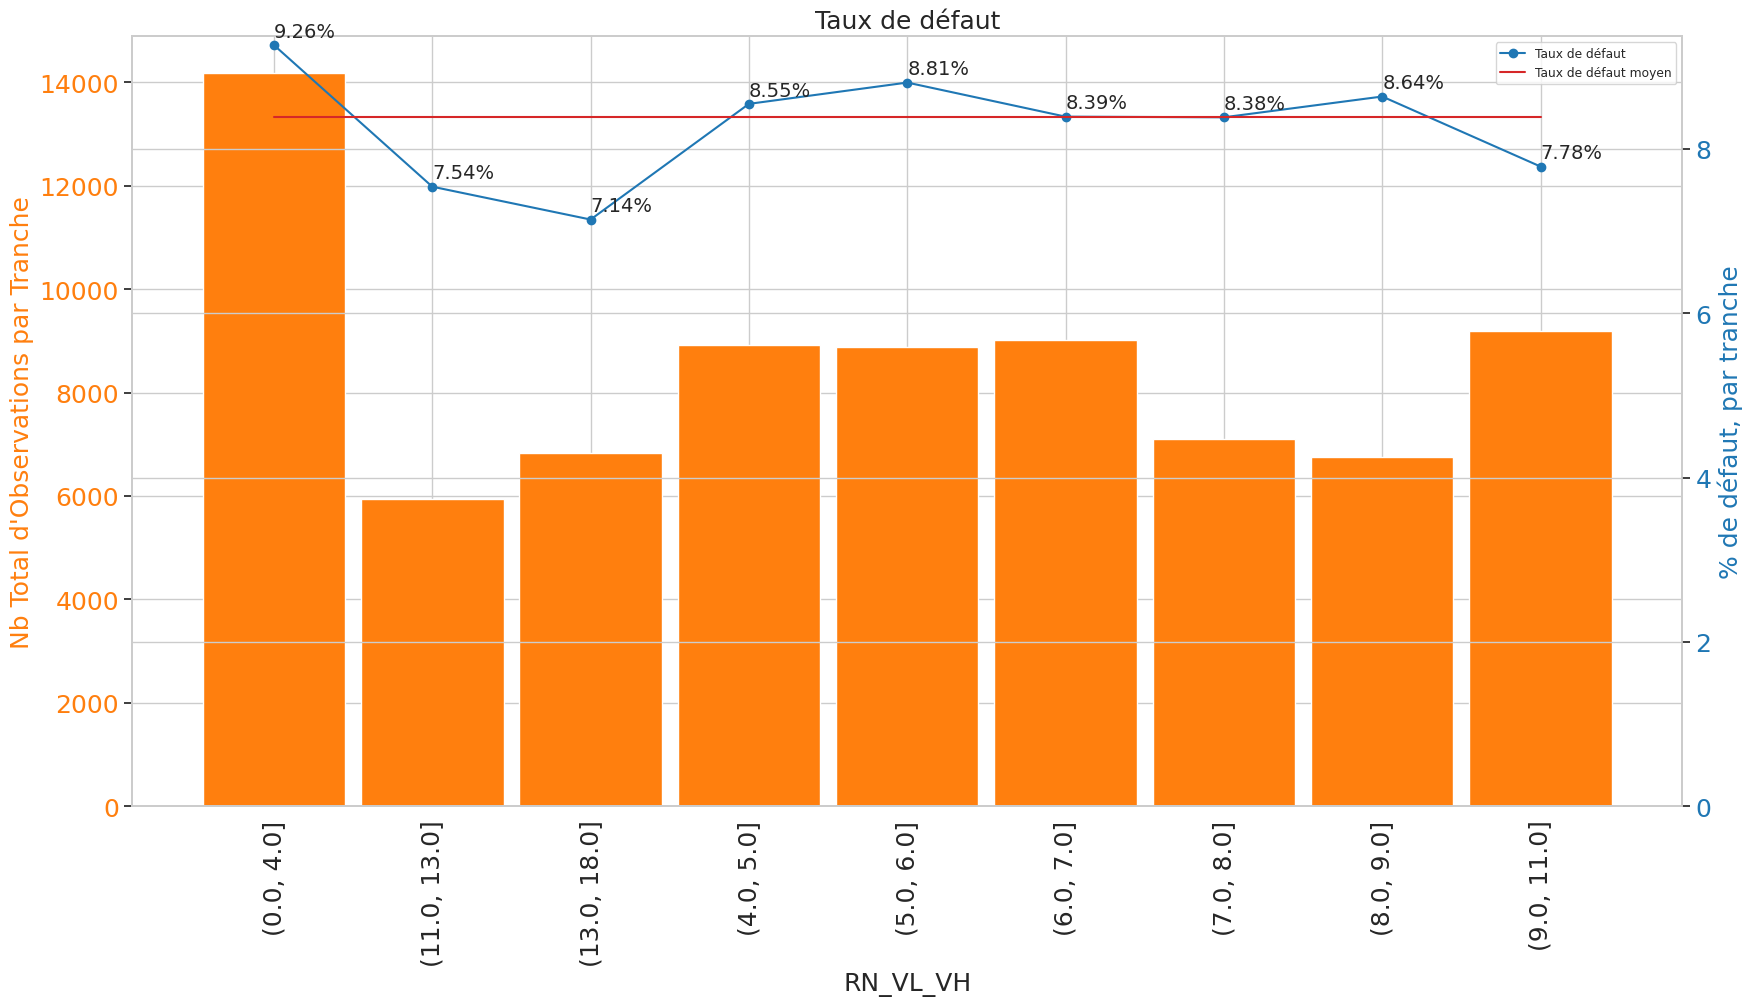

Analyse des taux de défaut en fonction de la variable NIVBM


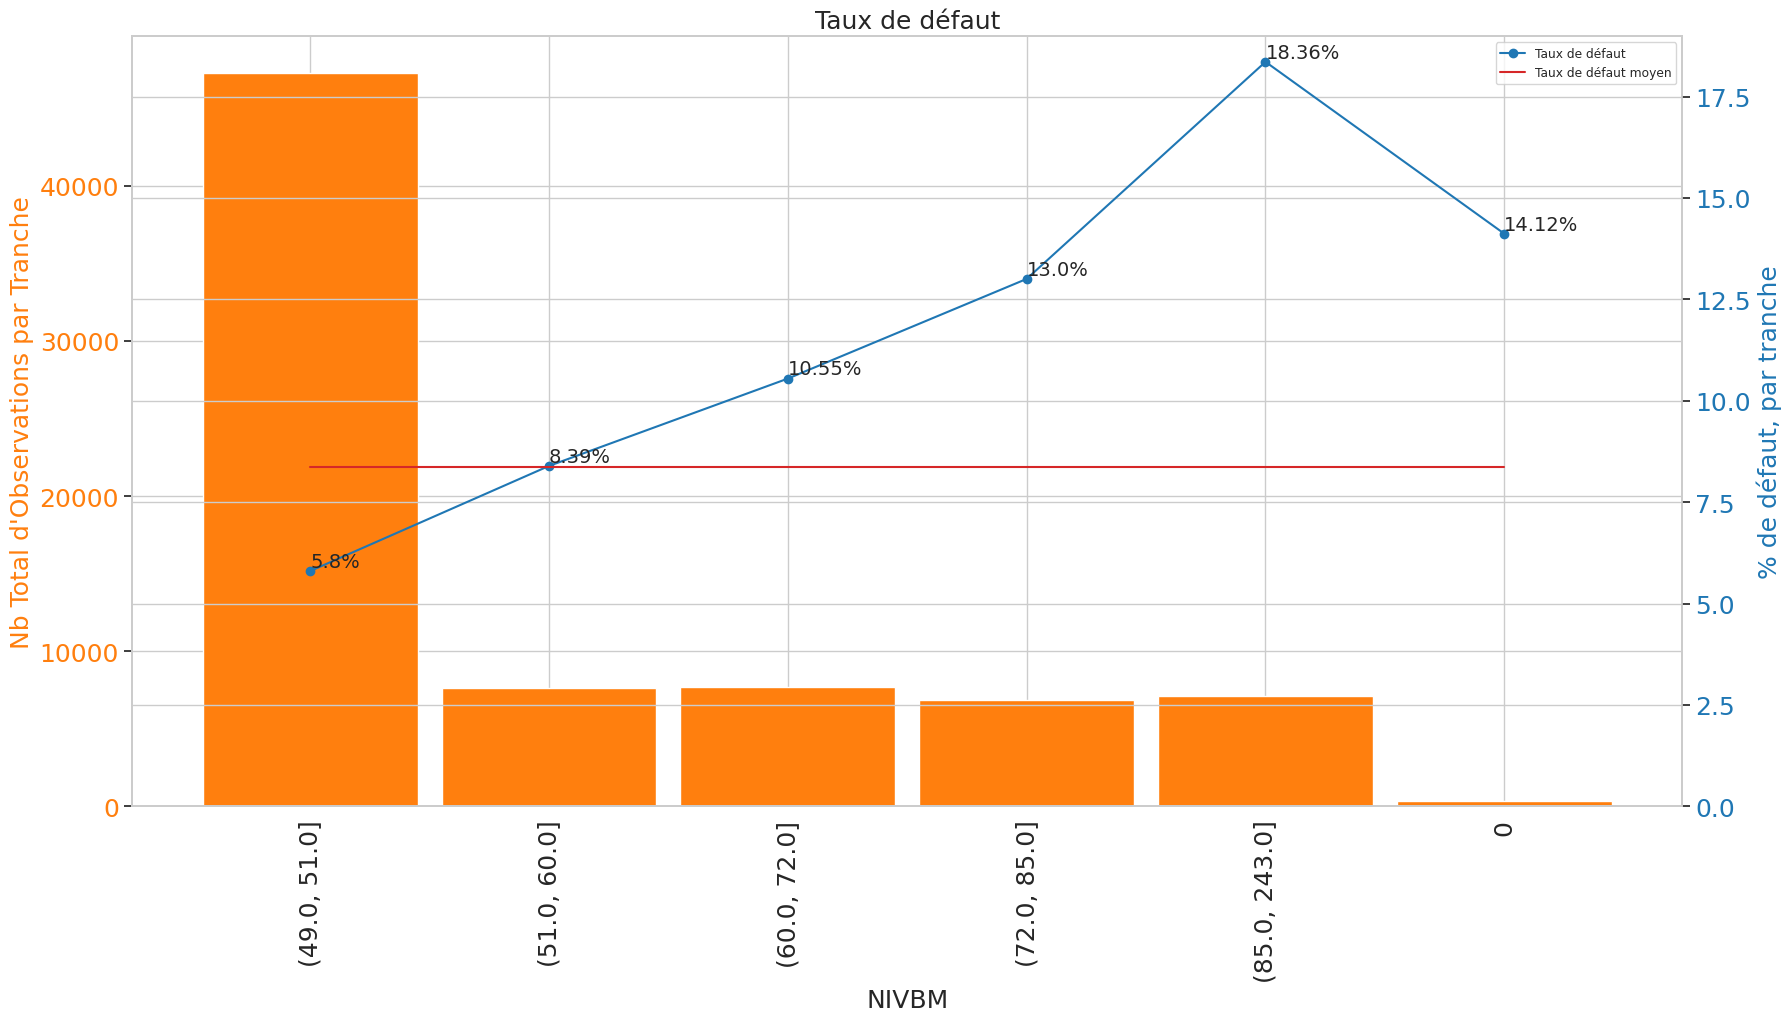

Analyse des taux de défaut en fonction de la variable MTPAAREF


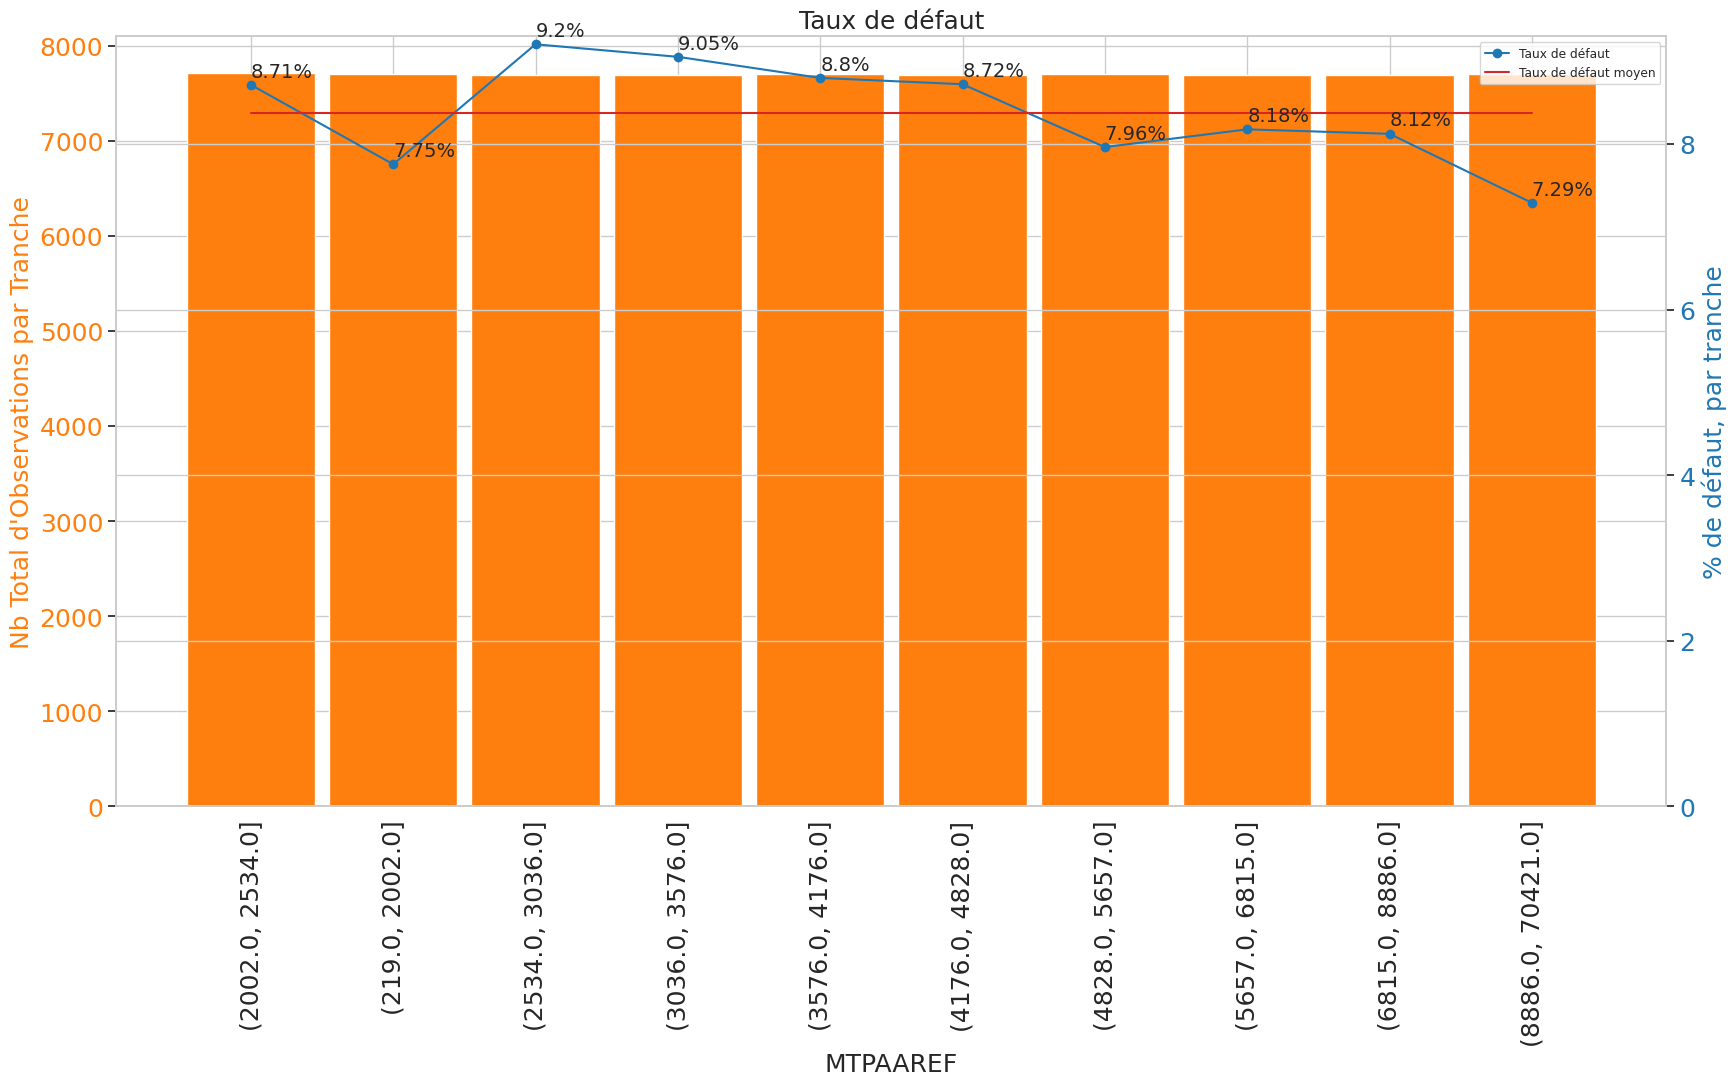

Analyse des taux de défaut en fonction de la variable COEFPFLT


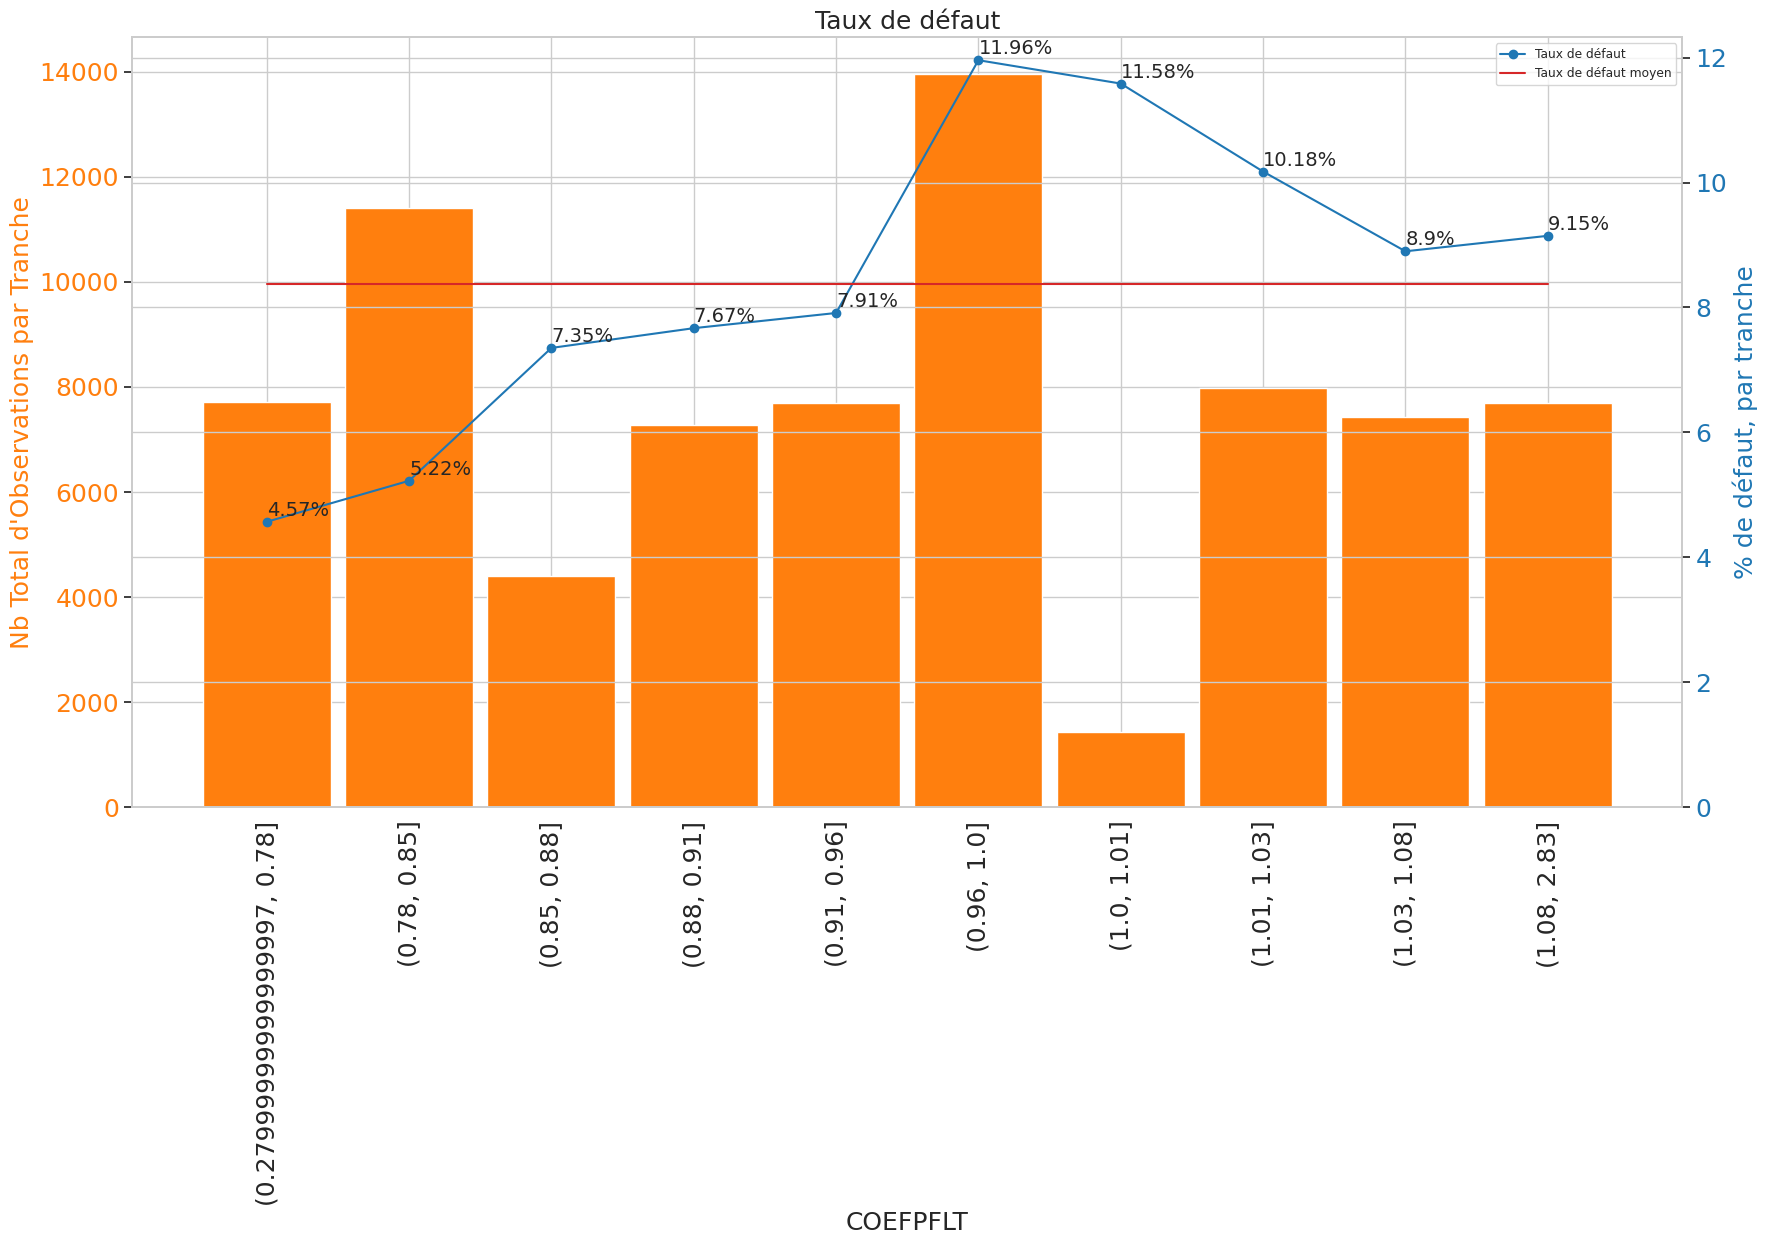

Analyse des taux de défaut en fonction de la variable CD_FML


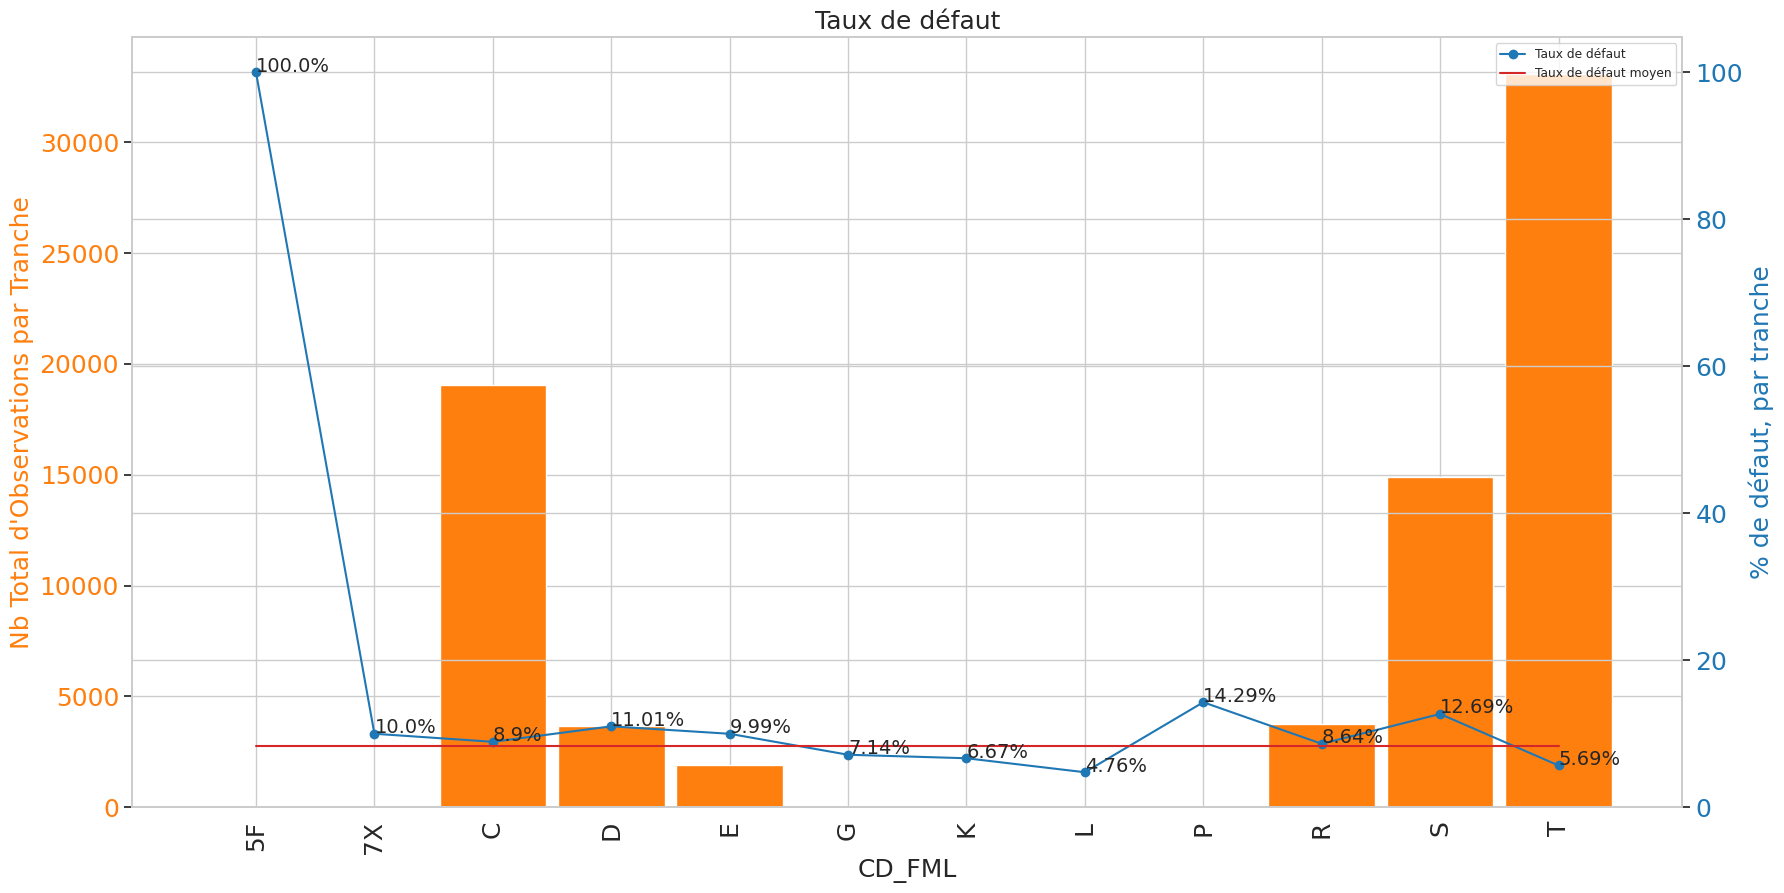

Analyse des taux de défaut en fonction de la variable NOTAREFF


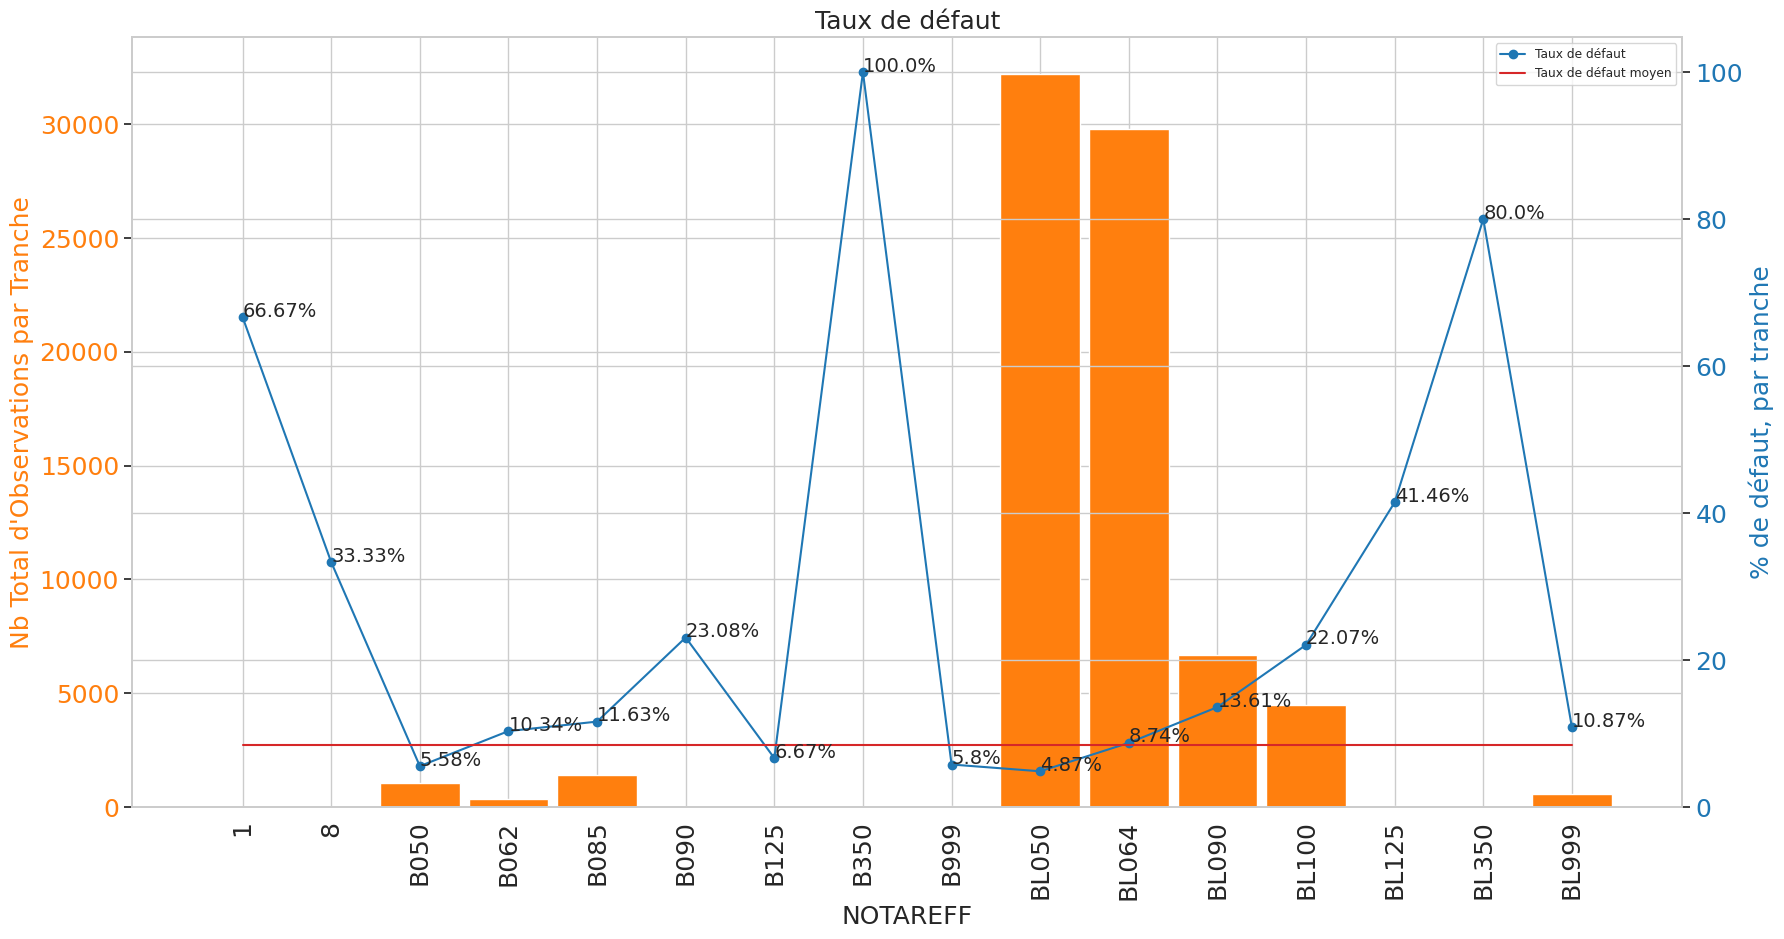

Analyse des taux de défaut en fonction de la variable PUI_TRE


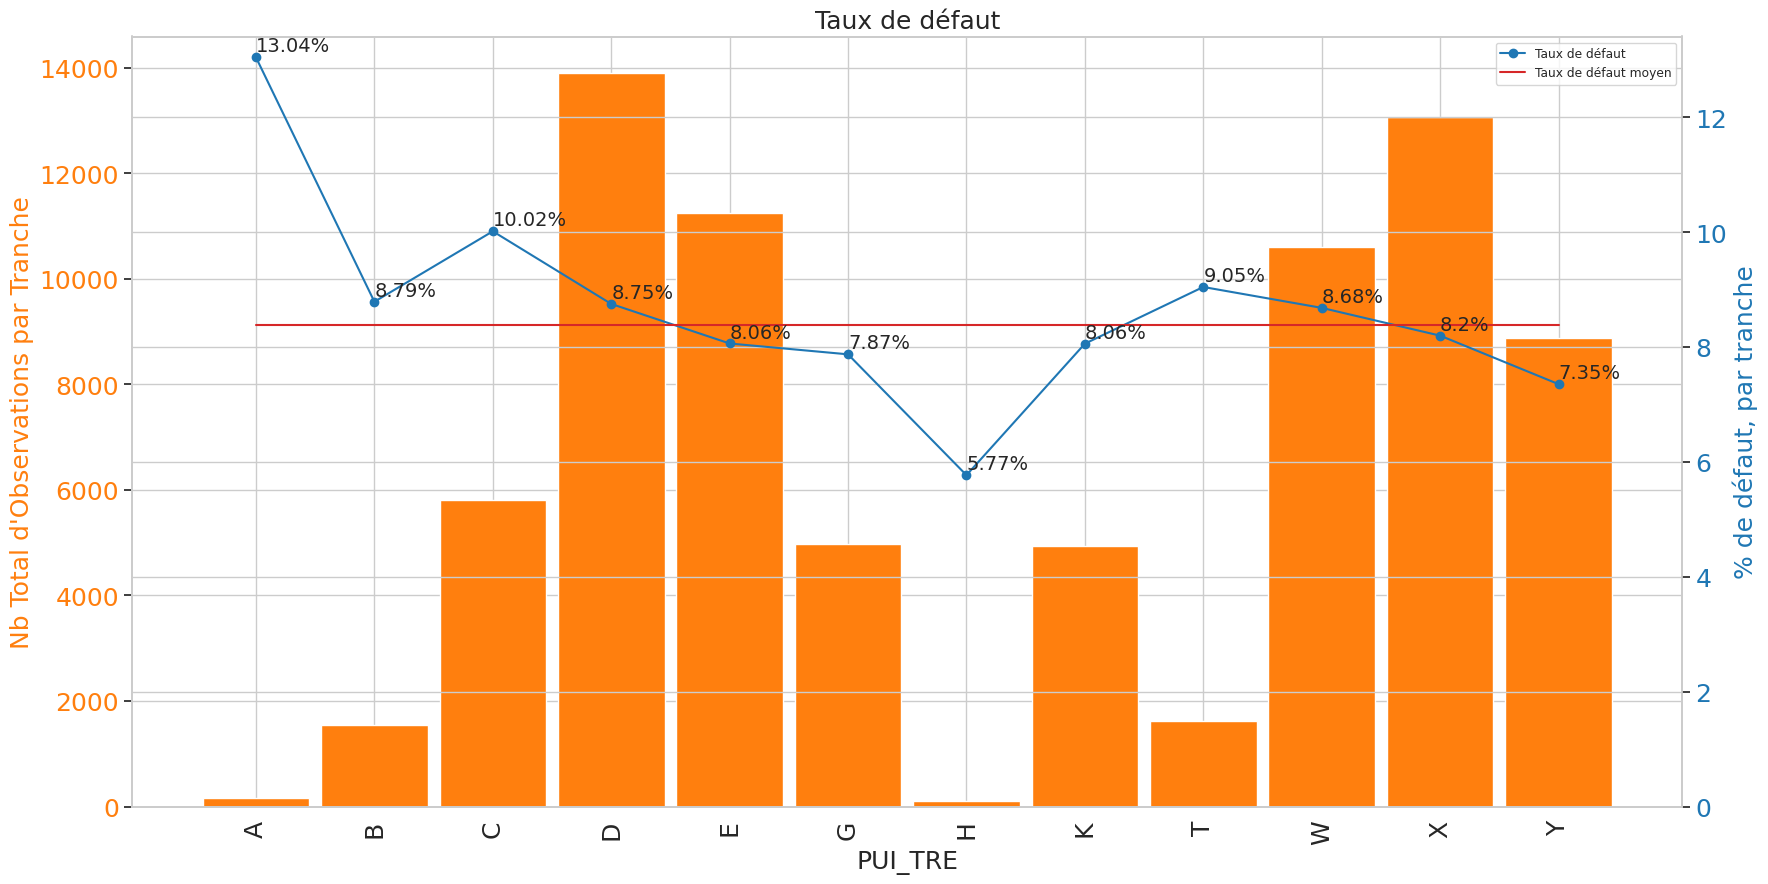

Analyse des taux de défaut en fonction de la variable CD_SEX


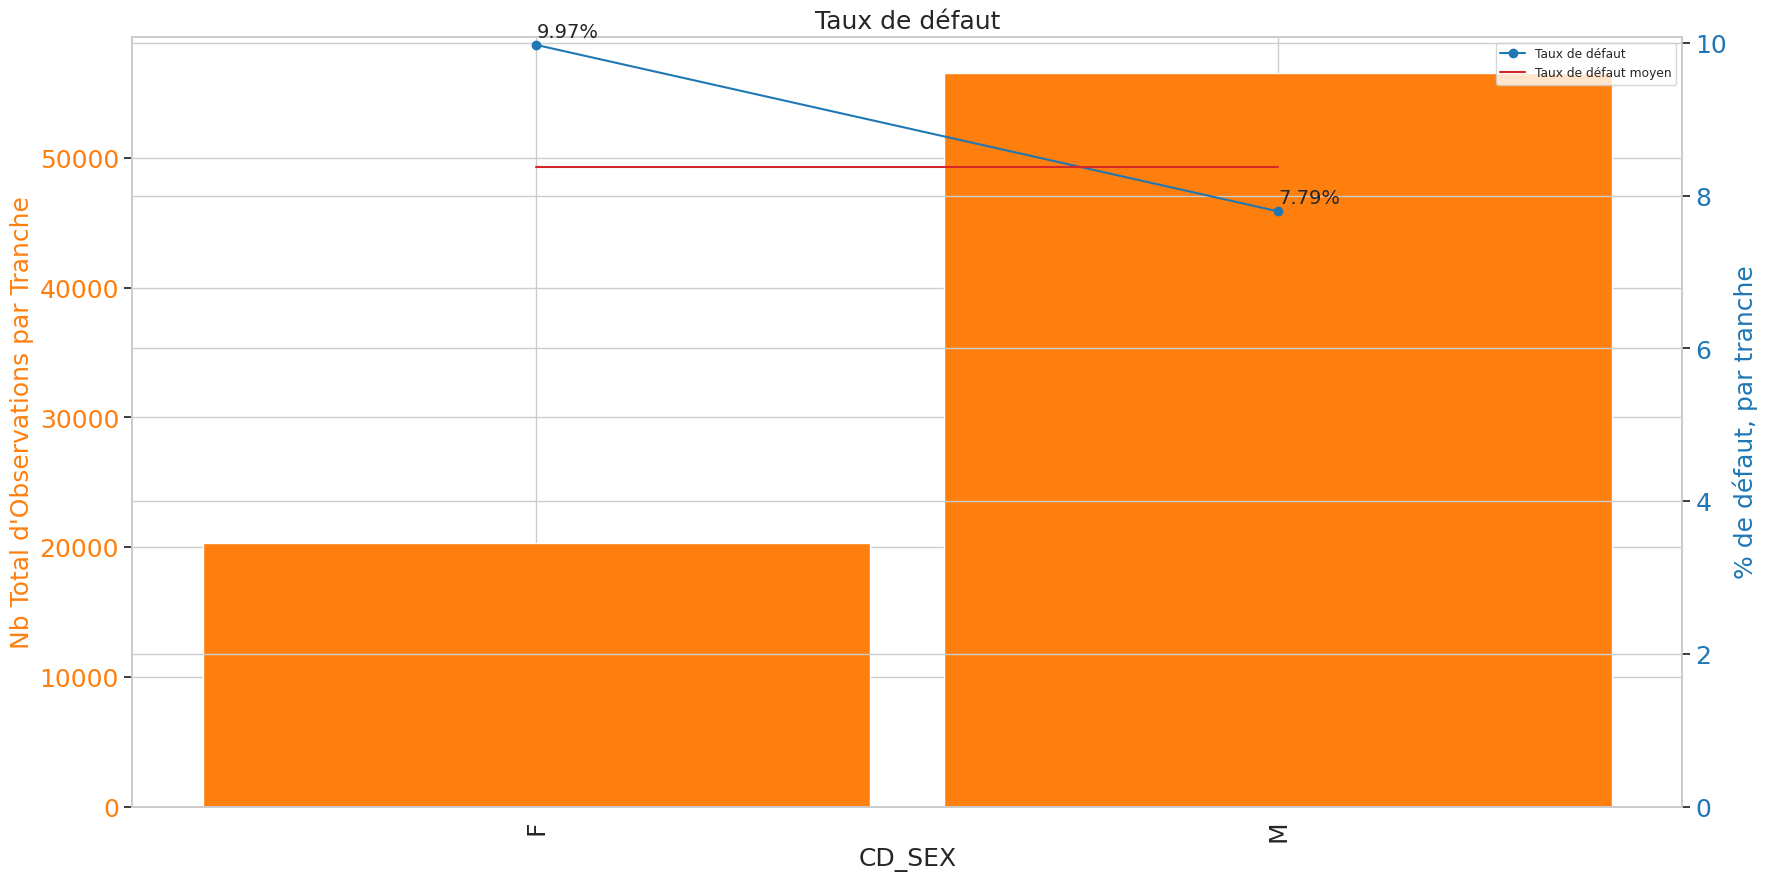

Analyse des taux de défaut en fonction de la variable CDSITFAM


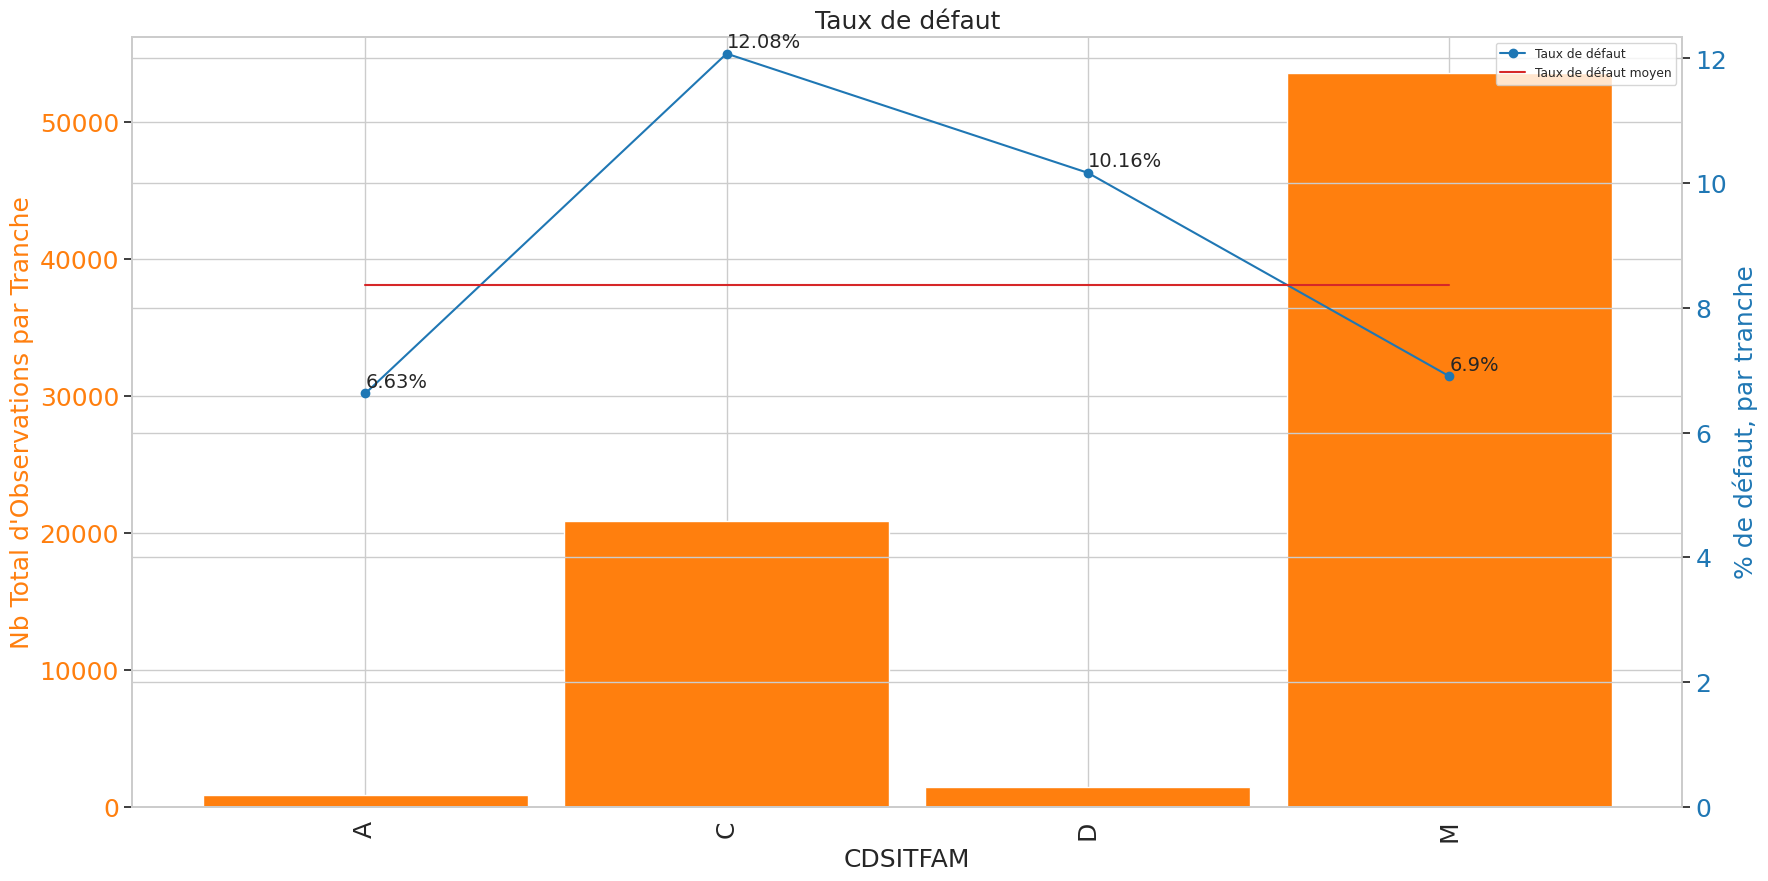

Analyse des taux de défaut en fonction de la variable REGION


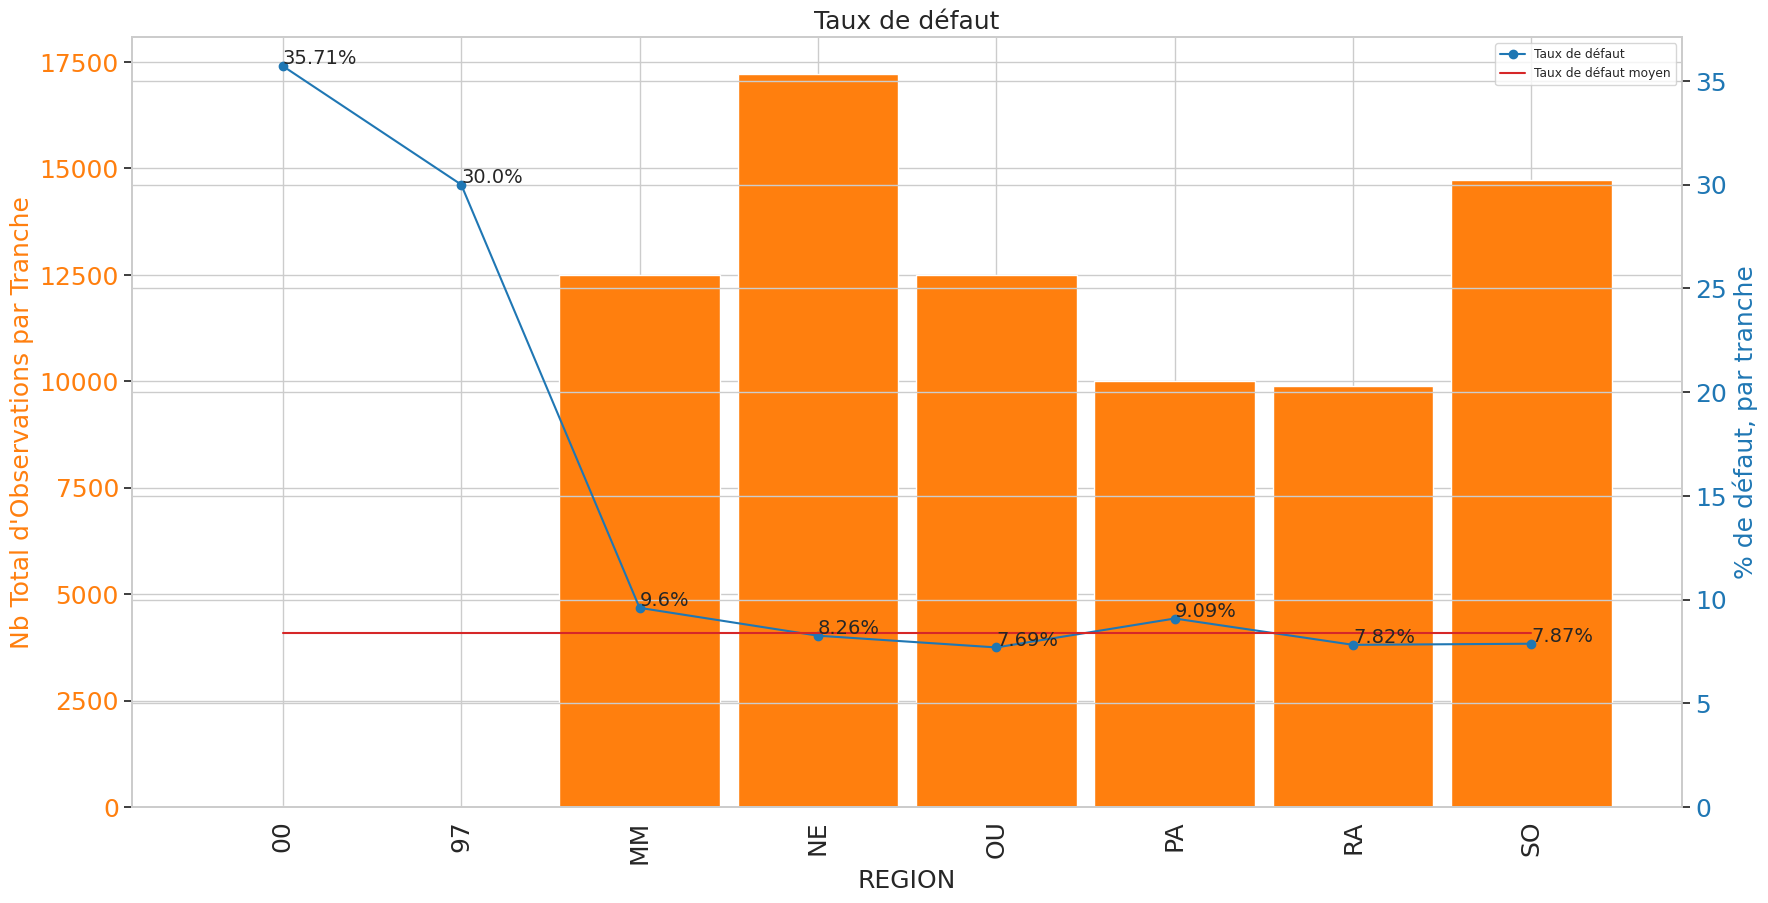

In [68]:
vars_to_plot = list(vars_to_plot)
list_var_cat = list(list_var_cat)

for field in vars_to_plot+list_var_cat:
  if field not in ['IDECON', 'CONTRAT', 'LBMDLVH', 'MMJECHPP', 'CDUSGAUT', 'CD_CSP','S_0_O', 'S_1_O',
                   'S_2_O', 'S_1_N', 'S_2_N', 'S_0_N', 'DI', 'SA', 'IV', 'MH', 'RESMH', 'RESSA',
                   'RESIV', 'RESDI', 'CDMARVEH', 'DEPT']:
    plot_generic(df,field,target)

# 7. Etude du lien entre variables explicatives et variable cible

Rappel : La régression logistique est très sensible à l'existence de multicolinéarités. Ainsi, il est préférable de prendre en compte les liens pouvant exister entre les variables afin de choisir plus efficacement celles que nous allons utiliser dans nos modèles de type régression logistique.

## 7.1 Lien entre les variables explicatives catégorielles

🔔 Rappel : On peut voir le V de Cramer comme la généralisation d'un test d'indépendance du Chi2

In [69]:
# Liste des variables catégorielles (pour rappel)
list_var_cat.remove('CONTRAT')
print(f'Liste des variables catégorielles : \n{list_var_cat}')

Liste des variables catégorielles : 
['CDUSGAUT', 'CD_FML', 'MMJECHPP', 'CDMARVEH', 'LBMDLVH', 'NOTAREFF', 'PUI_TRE', 'CD_CSP', 'CD_SEX', 'CDSITFAM', 'DEPT', 'REGION']


In [70]:
import scipy.stats as ss
def cramers(var1: str, var2: str, dataframe: pd.DataFrame):
    """
    Calcule le coefficient de Cramer pour deux variables catégorielles.

    Parameters:
        var1 (str): Nom de la première variable catégorielle.
        var2 (str): Nom de la deuxième variable catégorielle.
        dataframe (pd.DataFrame): DataFrame contenant les variables.

    Returns:
        tuple: (var1, var2, abs_V_cramer, chi2, prob_chi2)
               - abs_V_cramer : coefficient de Cramer arrondi à 3 décimales.
               - chi2        : statistique du test du chi2 arrondie à 3 décimales.
               - prob_chi2   : p-value du test arrondie à 4 décimales ou '< 0.0001' si très faible.
    """
    # Création de la table de contingence entre les deux variables
    crosstab = pd.crosstab(dataframe[var1], dataframe[var2], rownames=[var1], colnames=[var2])

    # Calcul du test du chi2 sur la table de contingence
    chi2, p_value, _, _ = ss.chi2_contingency(crosstab)

    # Nombre total d'observations
    n = crosstab.values.sum()

    # Calcul du V de Cramer
    # min(crosstab.shape)-1 correspond au degré de liberté minimum
    min_dim = min(crosstab.shape) - 1
    v_cramer = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan
    abs_v_cramer = round(abs(v_cramer), 3)

    # Formatage de la p-value
    prob_chi2 = round(p_value, 4)
    if prob_chi2 < 0.0001:
        prob_chi2 = '< 0.0001'

    return var1, var2, abs_v_cramer, round(chi2, 3), prob_chi2

 ['NO_AFR', 'IDECON', 'U', 'AUTO4R', 'NUMFOY', 'NOCLIGES', 'CONTRAT', 'LBMDLVH', 'CD_AGT', 'MMJECHPP', 'CDUSGAUT', 'CD_CSP', 'MOTIFRSL', 'CLIACTIF', 'ETAT', 'S_0_O', 'S_1_O', 'S_2_O', 'S_1_N', 'S_2_N', 'S_0_N',
                   'DI', 'SA', 'IV', 'MH', 'RESMH', 'RESSA', 'RESIV', 'RESDI', 'CDMARVEH', 'COEFCOMM', 'DEPT']:
    plot_generic(df,field,target)

In [71]:
from itertools import combinations
def cramers_v_between_all(list_var_category: list, dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Calcule le V de Cramer pour chaque paire unique de variables catégorielles explicatives.

    Parameters:
        list_var_category (list): Liste des noms des variables catégorielles.
        dataframe (pd.DataFrame): DataFrame contenant les variables.

    Returns:
        pd.DataFrame: DataFrame avec les résultats pour chaque paire, comportant les colonnes :
                      ['Variable_1', 'Variable_2', 'abs_V_cramer', 'Chi2', 'Prob_Chi2']
    """
    results = []
    # Utilisation de combinations pour générer toutes les paires uniques de variables
    for var1, var2 in combinations(list_var_category, 2):
        results.append(cramers(var1, var2, dataframe))

    # Création du DataFrame des résultats
    df_results = pd.DataFrame(results, columns=['Variable_1', 'Variable_2', 'abs_V_cramer', 'Chi2', 'Prob_Chi2'])
    # Suppression des doublons (au cas où) et tri décroissant par V de Cramer
    df_results = df_results.drop_duplicates(subset=['abs_V_cramer', 'Chi2', 'Prob_Chi2']).sort_values('abs_V_cramer', ascending=False)

    return df_results

In [72]:
df_vcramers = cramers_v_between_all(list_var_cat,df)
df_vcramers

,Variable_1,Variable_2,abs_V_cramer,Chi2,Prob_Chi2
65,DEPT,REGION,1.000,691371.000,< 0.0001
30,CDMARVEH,LBMDLVH,0.921,8677808.597,< 0.0001
39,LBMDLVH,PUI_TRE,0.685,469054.205,< 0.0001
13,CD_FML,LBMDLVH,0.656,757120.403,< 0.0001
0,CDUSGAUT,CD_FML,0.533,521054.994,< 0.0001
...,...,...,...,...,...
53,PUI_TRE,CDSITFAM,0.045,929.611,< 0.0001
62,CD_SEX,REGION,0.037,102.657,< 0.0001
50,NOTAREFF,REGION,0.030,702.233,< 0.0001
55,PUI_TRE,REGION,0.023,399.885,< 0.0001


In [73]:
df_vcramers.sort_values('abs_V_cramer',ascending=False).head(10)

,Variable_1,Variable_2,abs_V_cramer,Chi2,Prob_Chi2
65,DEPT,REGION,1.000,691371.000,< 0.0001
30,CDMARVEH,LBMDLVH,0.921,8677808.597,< 0.0001
39,LBMDLVH,PUI_TRE,0.685,469054.205,< 0.0001
13,CD_FML,LBMDLVH,0.656,757120.403,< 0.0001
0,CDUSGAUT,CD_FML,0.533,521054.994,< 0.0001
3,CDUSGAUT,LBMDLVH,0.512,1206918.959,< 0.0001
38,LBMDLVH,NOTAREFF,0.436,233704.957,< 0.0001
56,CD_CSP,CD_SEX,0.359,5456.415,< 0.0001
41,LBMDLVH,CD_SEX,0.350,9415.335,< 0.0001
40,LBMDLVH,CD_CSP,0.317,945545.226,1.0


In [74]:
df_vcramers['Prob_Chi2_Numeric'] = pd.to_numeric(df_vcramers['Prob_Chi2'],errors='coerce').fillna(0)
df_var_cat_liees = df_vcramers.loc[(df_vcramers['abs_V_cramer']>.4)&(df_vcramers['Prob_Chi2_Numeric']<.05)]

In [75]:
df_var_cat_liees

,Variable_1,Variable_2,abs_V_cramer,Chi2,Prob_Chi2,Prob_Chi2_Numeric
65,DEPT,REGION,1.000,691371.000,< 0.0001,0.0
30,CDMARVEH,LBMDLVH,0.921,8677808.597,< 0.0001,0.0
39,LBMDLVH,PUI_TRE,0.685,469054.205,< 0.0001,0.0
13,CD_FML,LBMDLVH,0.656,757120.403,< 0.0001,0.0
0,CDUSGAUT,CD_FML,0.533,521054.994,< 0.0001,0.0
3,CDUSGAUT,LBMDLVH,0.512,1206918.959,< 0.0001,0.0
38,LBMDLVH,NOTAREFF,0.436,233704.957,< 0.0001,0.0


## 7.2 Lien entre les variables catégorielles et la variable cible

In [76]:
def cramers_v_with_target(list_var_category: list, target: str, dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Calcule le V de Cramer entre chaque variable catégorielle de la liste et une variable cible.

    Parameters:
        list_var_category (list): Liste des noms des variables catégorielles.
        target (str): Nom de la variable cible.
        dataframe (pd.DataFrame): DataFrame contenant les variables.

    Returns:
        pd.DataFrame: DataFrame avec les résultats comportant les colonnes :
                      ['Variable', 'abs_V_cramer', 'Chi2', 'Prob Chi2']
    """
    results = []
    for var in list_var_category:
        results.append(cramers(var, target, dataframe))

    # Création du DataFrame avec une colonne superflue "Variable 2" qui sera ensuite retirée
    df_results = pd.DataFrame(results, columns=['Variable', 'Variable_2', 'abs_V_cramer', 'Chi2', 'Prob_Chi2'])
    # Retrait de la colonne redondante et tri décroissant par V de Cramer
    df_results = df_results.drop(columns='Variable_2').sort_values('abs_V_cramer', ascending=False)

    return df_results

In [77]:
df_vcramers_target = cramers_v_with_target(list_var_cat,target,df)
df_vcramers_target

,Variable,abs_V_cramer,Chi2,Prob_Chi2
2,MMJECHPP,0.330,8359.792,< 0.0001
4,LBMDLVH,0.288,6383.042,0.056
5,NOTAREFF,0.163,2046.900,< 0.0001
1,CD_FML,0.098,740.884,< 0.0001
7,CD_CSP,0.088,328.194,< 0.0001
0,CDUSGAUT,0.083,524.036,< 0.0001
9,CDSITFAM,0.083,533.962,< 0.0001
10,DEPT,0.065,323.277,< 0.0001
3,CDMARVEH,0.051,198.676,0.0002
8,CD_SEX,0.035,92.318,< 0.0001


In [78]:
df_vcramers_target['Prob_Chi2_Numeric'] = pd.to_numeric(df_vcramers_target['Prob_Chi2'],errors='coerce').fillna(0)
df_cat_non_signif_target = df_vcramers_target.loc[df_vcramers_target['Prob_Chi2_Numeric']>.05]
list_cat_non_signif_target = df_cat_non_signif_target['Variable'].tolist()

print(f"""Lien avec "{target}" non significatif pour les variables: {", ".join(list_cat_non_signif_target)}""")

Lien avec "CONTRAT" non significatif pour les variables: LBMDLVH


# 8. Etude du lien entre variables explicatives continue et variable cible

## 8.1 Etude du lien entre les variables explicatives continues

In [79]:
df[[col for col in list_var_num]].corr(method='pearson')

,ANCCLI,COEFPFLT,DI,DTDBUCON,DTOBTPDC,DTPMRMCI,DT_NAI,IV,MH,MTPAAREF,...,RESMH,RESSA,RN_VL_VH,SA,S_0_N,S_0_O,S_1_N,S_1_O,S_2_N,S_2_O
ANCCLI,1.000000,-0.132924,-0.197760,0.663086,0.460095,0.000415,0.525793,-0.107041,-0.270118,0.014693,...,-0.088541,-0.075808,0.037790,-0.087502,0.036670,0.033468,0.031877,0.043819,0.028385,0.009693
COEFPFLT,-0.132924,1.000000,0.007147,-0.141125,-0.137149,-0.318435,-0.166269,-0.002789,-0.028818,-0.360446,...,-0.103001,-0.056640,-0.343269,-0.015322,-0.047398,-0.005006,-0.036971,0.017221,-0.052839,0.018689
DI,-0.197760,0.007147,1.000000,-0.067719,-0.081639,-0.005180,-0.104537,0.111065,0.145201,0.026851,...,-0.090874,0.082035,0.049453,0.282183,-0.015553,0.003888,0.009237,-0.021729,0.013307,0.026658
DTDBUCON,0.663086,-0.141125,-0.067719,1.000000,0.457987,-0.018870,0.461218,-0.066979,-0.135401,-0.020698,...,-0.052362,-0.031792,0.013467,-0.019643,0.042527,0.039818,0.025392,0.050366,0.037454,-0.005493
DTOBTPDC,0.460095,-0.137149,-0.081639,0.457987,1.000000,0.004379,0.785398,-0.079048,-0.199178,-0.040239,...,-0.069394,-0.024027,-0.077502,-0.029590,0.037006,0.053910,0.025153,0.013721,0.026293,-0.009044
DTPMRMCI,0.000415,-0.318435,-0.005180,-0.018870,0.004379,1.000000,0.011819,0.031430,0.045951,0.501162,...,0.084498,0.026803,0.249494,0.001494,0.051002,0.004439,0.040887,0.014823,0.059148,0.024144
DT_NAI,0.525793,-0.166269,-0.104537,0.461218,0.785398,0.011819,1.000000,-0.088551,-0.238668,-0.008938,...,-0.079970,-0.040636,0.004215,-0.050716,0.031928,0.058757,0.041789,0.020667,0.029990,0.002355
IV,-0.107041,-0.002789,0.111065,-0.066979,-0.079048,0.031430,-0.088551,1.000000,0.132786,0.054719,...,-0.018025,0.071878,0.032398,0.129105,0.015066,0.005589,0.004936,-0.013052,-0.001127,0.007006
MH,-0.270118,-0.028818,0.145201,-0.135401,-0.199178,0.045951,-0.238668,0.132786,1.000000,0.080279,...,0.012613,0.013995,0.056959,0.110345,0.008562,-0.007076,-0.006093,0.009335,0.018369,0.010051
MTPAAREF,0.014693,-0.360446,0.026851,-0.020698,-0.040239,0.501162,-0.008938,0.054719,0.080279,1.000000,...,0.045547,0.024630,0.674013,0.015077,0.082932,0.036321,0.089858,0.040093,0.082561,0.040858


In [80]:
def graph_correlations(list_cont_var: list, dataframe: pd.DataFrame, method: str = "pearson") -> None:
    """
    Affiche une heatmap des corrélations entre variables continues dans une figure compacte,
    en ajustant dynamiquement l'échelle de la police et la taille de la figure en fonction du nombre de variables.

    La fonction calcule la matrice de corrélation pour les variables spécifiées dans `list_cont_var`
    en utilisant la méthode indiquée (par défaut 'pearson'). L'échelle de la police et la taille de la figure
    sont ajustées de sorte que le texte reste lisible et que la figure offre suffisamment d'espace,
    même lorsque le nombre de variables varie.

    Parameters
    ----------
    list_cont_var : list
        Liste des noms de colonnes correspondant aux variables continues à analyser.
    dataframe : pd.DataFrame
        DataFrame contenant les données.
    method : str, optionnel
        Méthode de calcul de corrélation (exemple : 'pearson', 'spearman', 'kendall'). Par défaut 'pearson'.

    Returns
    --------
    None
        La fonction affiche la heatmap et ne retourne rien.
    """

    # Calculer la matrice de corrélation pour les variables continues spécifiées
    corrmat = dataframe[list_cont_var].corr(method=method)

    # Ajuster la taille de la figure et de la police selon le nombre de variables à étudier
    n = len(list_cont_var)
    figsize = (max(10, n * 1.2), max(10, n * 1.2))
    plt.figure(figsize=figsize)
    font_scale = max(0.8, 10 / n)
    sns.set_theme(font_scale=font_scale, style="whitegrid")

    # Afficher la heatmap avec annotations et une palette de couleurs "coolwarm"
    sns.heatmap(corrmat, annot=True, cmap="coolwarm", square=True)

    # Afficher le graphique
    plt.show()

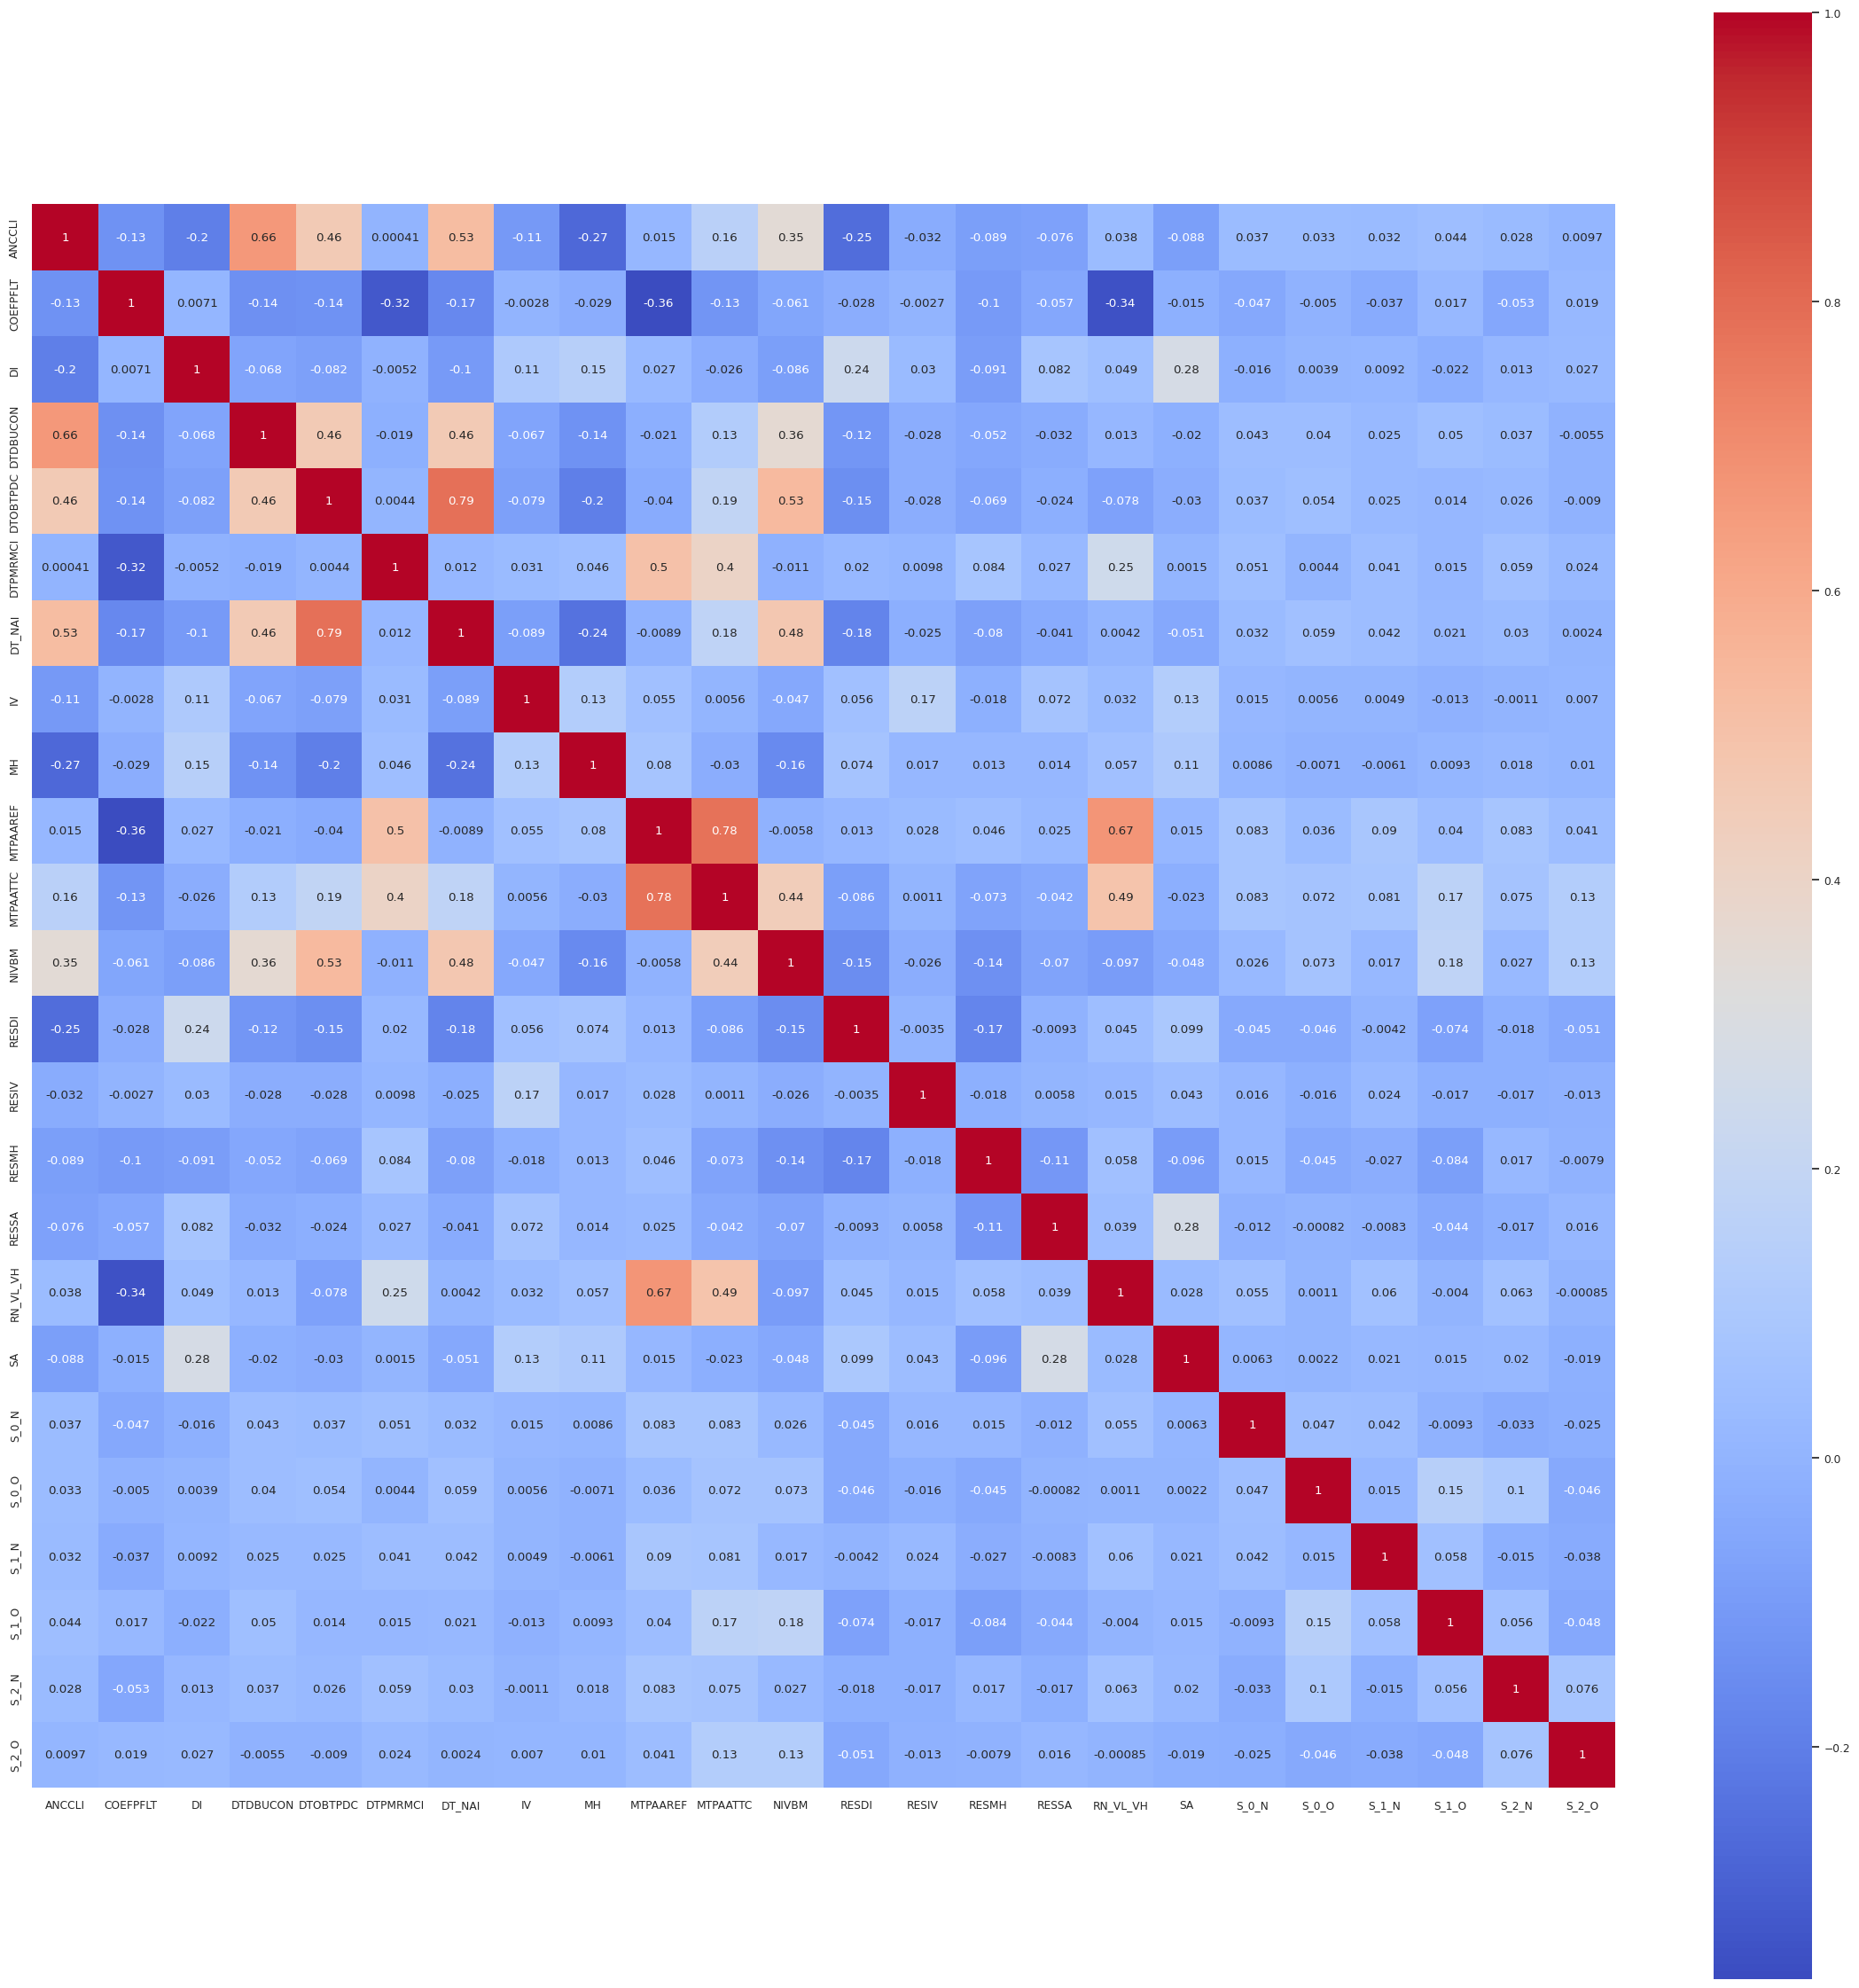

In [81]:
graph_correlations([col for col in list_var_num],df)

In [82]:
def extract_corr_pairs(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcule la matrice de corrélation d'un DataFrame et la reformate en un DataFrame plus lisible.

    La fonction réalise les opérations suivantes :
      - Calcule la matrice de corrélation à l'aide de df.corr().
      - Masque le triangle inférieur et la diagonale de la matrice (les remplaçant par NaN) afin de ne conserver
        que la partie supérieure.
      - Convertit la matrice masquée en un DataFrame à trois colonnes :
          - 'var_1' : première variable
          - 'var_2' : seconde variable
          - 'corr'  : coefficient de corrélation entre les deux variables.
      - Ajoute une colonne 'corr_abs' contenant la valeur absolue de la corrélation.
      - Trie le DataFrame par 'corr_abs' en ordre décroissant, puis par 'var_1' en ordre croissant.

    Parameters
    ----------
    df : pandas.DataFrame
        Le DataFrame contenant les variables pour lesquelles la corrélation doit être calculée.

    Returns
    --------
    pandas.DataFrame
        Un DataFrame contenant trois colonnes ('var_1', 'var_2', 'corr') ainsi qu'une colonne 'corr_abs' qui
        représente la valeur absolue de la corrélation, trié par ordre décroissant de 'corr_abs'.
    """
    # Calcul de la matrice de corrélation
    cor = df.corr()

    # Création d'un masque pour le triangle inférieur et la diagonale (valeurs à masquer)
    mask = np.tril(np.ones(cor.shape, dtype=bool))

    # Masquer le triangle inférieur et la diagonale de la matrice
    corr = cor.mask(mask)

    # Convertir la matrice masquée en DataFrame avec les paires de variables et leur corrélation
    corr_df = (
        corr.stack()                                  # Empile la matrice pour obtenir une Series avec MultiIndex
            .sort_values(ascending=False)             # Trie par ordre décroissant de corrélation
            .reset_index()                             # Réinitialise l'index pour obtenir un DataFrame
            .rename(columns={'level_0': 'var_1', 'level_1': 'var_2', 0: 'corr'})
    )

    # Ajouter une colonne avec la valeur absolue de la corrélation
    corr_df['corr_abs'] = corr_df['corr'].abs()

    # Trier le DataFrame par valeur absolue de corrélation (décroissant) puis par var_1 (croissant)
    corr_df.sort_values(['corr_abs', 'var_1'], ascending=[False, True], inplace=True)

    return corr_df

In [83]:
corrdf = extract_corr_pairs(df[[col for col in list_var_num]])

In [84]:
corrdf

,var_1,var_2,corr,corr_abs
0,DTOBTPDC,DT_NAI,0.785398,0.785398
1,MTPAAREF,MTPAATTC,0.780581,0.780581
2,MTPAAREF,RN_VL_VH,0.674013,0.674013
3,ANCCLI,DTDBUCON,0.663086,0.663086
4,DTOBTPDC,NIVBM,0.533945,0.533945
...,...,...,...,...
153,RN_VL_VH,S_0_O,0.001119,0.001119
154,MTPAATTC,RESIV,0.001089,0.001089
157,RN_VL_VH,S_2_O,-0.000847,0.000847
156,RESSA,S_0_O,-0.000817,0.000817


In [85]:
### Focus sur les variables explicatives fortement corrélées entre elles
seuil_corr = 0.5
high_corr_df = corrdf[abs(corrdf['corr'])>=seuil_corr]
high_corr_df

,var_1,var_2,corr,corr_abs
0,DTOBTPDC,DT_NAI,0.785398,0.785398
1,MTPAAREF,MTPAATTC,0.780581,0.780581
2,MTPAAREF,RN_VL_VH,0.674013,0.674013
3,ANCCLI,DTDBUCON,0.663086,0.663086
4,DTOBTPDC,NIVBM,0.533945,0.533945
5,ANCCLI,DT_NAI,0.525793,0.525793
6,DTPMRMCI,MTPAAREF,0.501162,0.501162


## 8.2 Lien entre les variables explicatives continues et la variable cible

In [86]:
from scipy.stats import mannwhitneyu
import pandas as pd


var_quanti = [col for col in list_var_num]

target = 'CONTRAT'
modalites = df[target].dropna().unique()

# Vérifie qu'il y a bien deux modalités
if len(modalites) != 2:
    raise ValueError(f"La variable cible '{target}' doit contenir exactement deux modalités pour ce test.")

results = []

for var in var_quanti:
    group1 = df[df[target] == modalites[0]][var].dropna()
    group2 = df[df[target] == modalites[1]][var].dropna()

    if len(group1) > 10 and len(group2) > 10:
        stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
        results.append({
            'Variable': var,
            #f'Taille {modalites[0]}': len(group1),
            #f'Taille {modalites[1]}': len(group2),
            'Statistique U': round(stat, 2),
            'P-valeur': round(p_val, 4),
            'Différence significative': 'Oui' if p_val <= 0.05 else 'Non'
        })
    else:
        results.append({
            'Variable': var,
            #f'Taille {modalites[0]}': len(group1),
            #f'Taille {modalites[1]}': len(group2),
            'Statistique U': 'NA',
            'P-valeur': 'NA',
            'Différence significative': 'Pas assez de données'
        })

results_df = pd.DataFrame(results)
print(results_df.sort_values("P-valeur", na_position='last'))

    Variable  Statistique U  P-valeur Différence significative
0     ANCCLI    170760206.5    0.0000                      Oui
1   COEFPFLT    196024449.0    0.0000                      Oui
3   DTDBUCON    191624991.5    0.0000                      Oui
4   DTOBTPDC    191303184.5    0.0000                      Oui
6     DT_NAI    178009835.0    0.0000                      Oui
5   DTPMRMCI    258297420.0    0.0000                      Oui
10  MTPAATTC    191974045.0    0.0000                      Oui
8         MH     52918003.5    0.0000                      Oui
14     RESMH     30931473.0    0.0000                      Oui
13     RESIV     21974649.0    0.0000                      Oui
11     NIVBM    171653202.0    0.0000                      Oui
12     RESDI     28627009.0    0.0000                      Oui
15     RESSA     24870110.5    0.0000                      Oui
19     S_0_O       713154.5    0.0000                      Oui
17        SA     64398374.0    0.0000                  